In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

## <span style ="color:red"> Data Load: Load DeanSautmann-WBER-HealthOutcomesMali into a dataframe 

In [58]:

df =  pd.read_csv("DeanSautmann-WBER-HealthOutcomesMali.csv")
df1= df.copy()
df1.head(10)


,FPrimary,Person_ID,compound,Mother_ID,surveyor_ID,survey_date,consent,child_consent_,TrtOrder,TrtOrder2013,...,Ill_days_total,Blood_Stool_last_week,Three_Stool_last_week,MUAC_danger,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct,tag_HH,tag_C,tag_M
0,301,102,3,100,36,10/31/2014,1.0,9.0,1.0,1.0,...,3,0,0,0.0,0,0,0,0,1,1
1,301,101,3,100,36,10/31/2014,1.0,9.0,1.0,1.0,...,0,0,0,NaN,0,0,0,1,0,0
2,601,101,6,100,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,0.0,1,1,1,1,0,1
3,602,105,6,100,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,NaN,1,1,1,0,1,1
4,602,310,6,300,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,0.0,1,0,1,0,0,1
5,602,309,6,300,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,NaN,1,0,1,1,0,0
6,701,105,7,100,36,10/29/2014,1.0,9.0,1.0,1.0,...,0,0,0,0.0,1,1,1,0,0,1
7,701,106,7,100,36,10/29/2014,1.0,9.0,1.0,1.0,...,3,0,0,0.0,1,1,1,1,0,0
8,702,105,7,100,36,10/29/2014,1.0,9.0,1.0,1.0,...,7,0,0,0.0,1,1,1,1,1,1
9,801,103,8,100,30,10/30/2014,1.0,9.0,3.0,3.0,...,0,0,0,0.0,0,1,0,1,1,1


In [59]:
df1.shape

(1652, 243)

### <span style="color :#b407f5"> Data Cleaning: Handle NA values

In [60]:
# Check missing values count and percentage

missing_values = df1.isnull().sum()
missing_percentage = (missing_values / len(df1)) * 100

# Create a DataFrame to display missing value stats
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print(missing_df)


                               Missing Values  Percentage
DTCoq_number_sr_                         1652  100.000000
Previous_water_source_other              1652  100.000000
health_program_benefit_other_            1651   99.939467
Mosquito_net_status_other_               1648   99.757869
Current_water_source_other               1645   99.576271
...                                       ...         ...
same_mother                                 1    0.060533
Ill_day_7_                                  1    0.060533
consent                                     1    0.060533
Current_water_source                        1    0.060533
Ill_day_6_                                  1    0.060533

[201 rows x 2 columns]


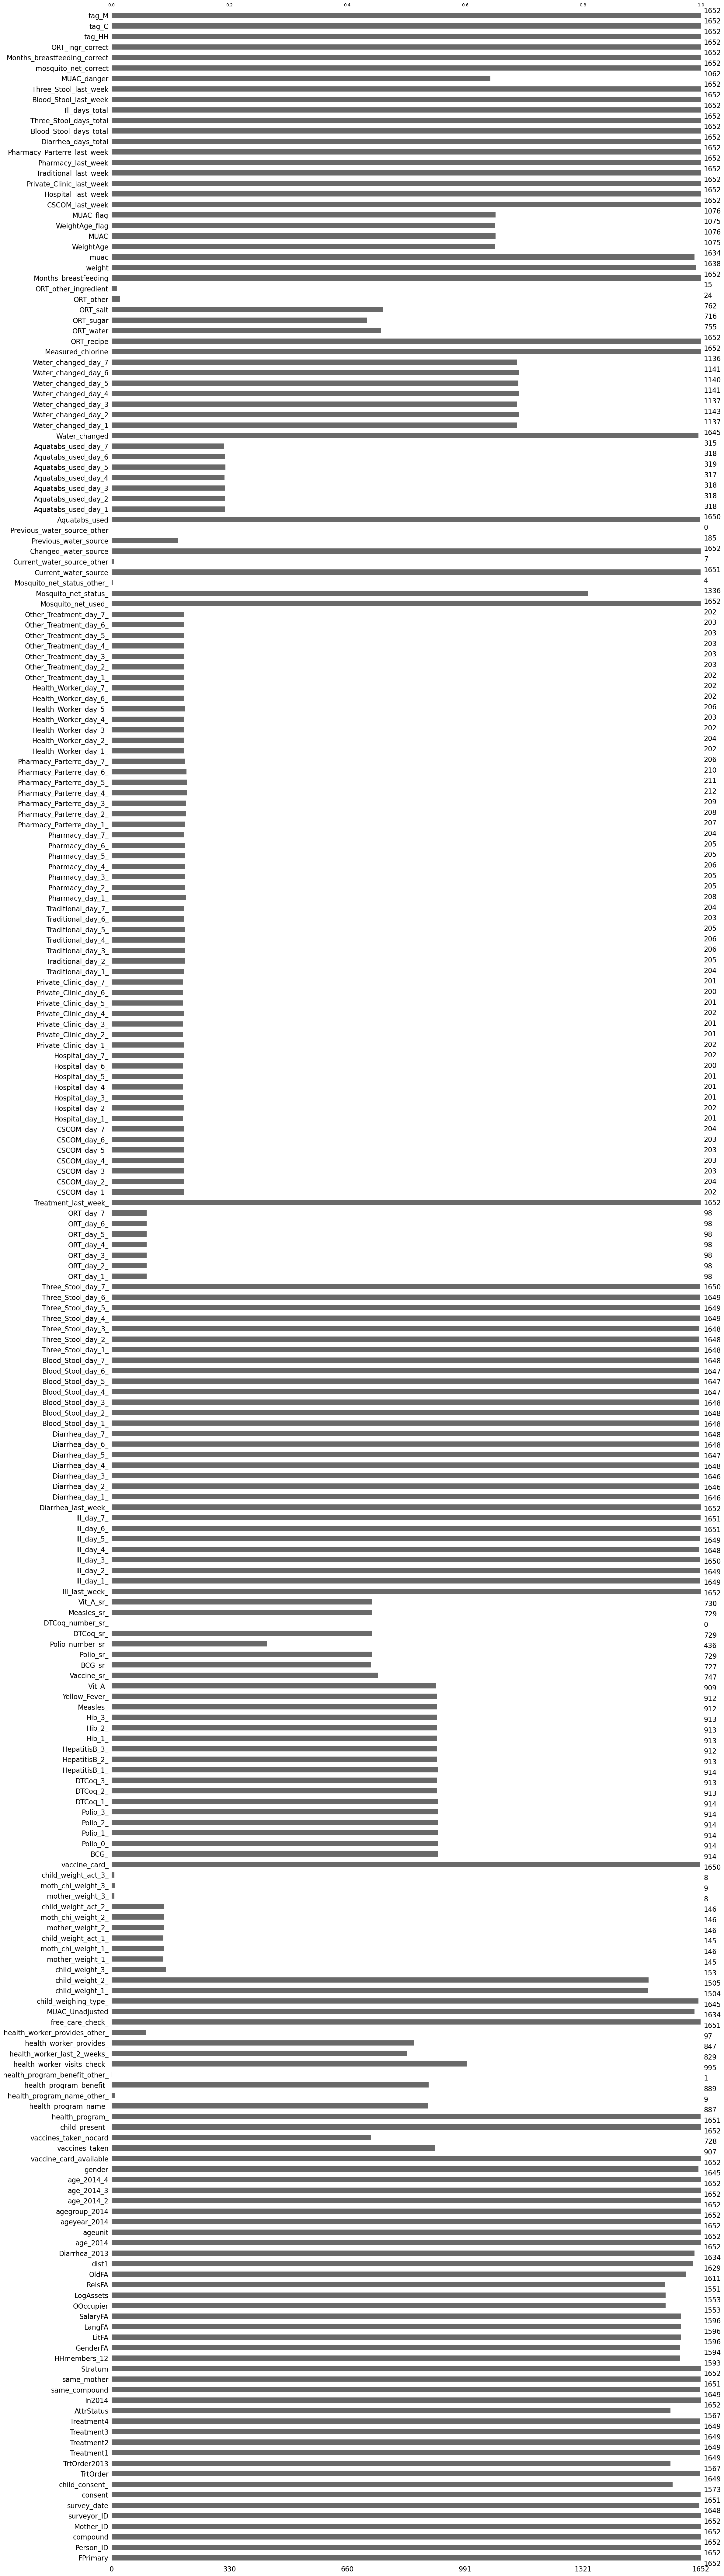

In [61]:
#................................visualization..............................
#!pip install missingno

import missingno as msno
msno.bar(df1)
plt.show()

# missingno is a great Python library for visualizing missing data in a dataset.
# You can use it to quickly assess the completeness of your dataset and identify patterns of missing values.


In [62]:

# ------------------Drop columns with more than 70% missing values (ignore errors if column is missing)-----------------------------

df1 = df1.drop(columns=missing_percentage[missing_percentage >70].index, errors='ignore')


In [63]:
#----------------------------------handling mising data...................................
from sklearn.impute import SimpleImputer

df_clean = df1.copy()

# Separate numerical and categorical columns
num_cols = df_clean.select_dtypes(include=["number"]).columns
cat_cols = df_clean.select_dtypes(include=["object", "category"]).columns

# Store original dtypes for numeric columns
original_dtypes = df_clean[num_cols].dtypes

# Impute numerical columns with median
if df_clean[num_cols].isna().any().any():
    num_imputer = SimpleImputer(strategy="median")
    df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])
    
    # Restore integer types where appropriate  (  note :... if needed .....)
    for col in num_cols:
        if original_dtypes[col] == 'int64' and df_clean[col].dropna().apply(float.is_integer).all():
            df_clean[col] = df_clean[col].astype('int64')

        # After imputation, all values become floats (even integers).Checks if the original column was int64.
        # Ensures all values are whole numbers (using .apply(float.is_integer).all()).
        # Converts the column back to int64 to maintain the original data type.
        
else:
    print("No missing values in numerical columns.")

# Impute categorical columns with mode
if df_clean[cat_cols].isna().any().any():
    cat_imputer = SimpleImputer(strategy="most_frequent")
    df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])
else:
    print("No missing values in categorical columns.")

print("Missing values after imputation:", df_clean.isna().sum().sum())
#print("Dtypes after imputation:\n", df_clean.dtypes)


Missing values after imputation: 0


#### <span style="color :blue"> Handle Duplicate or Similar Columns

In [64]:

# -----------------Check for and remove duplicate columns using drop_duplicates-------------------------------------


# Check for and remove duplicate columns

unique_cols = ~df_clean.T.duplicated()
df_clean = df_clean.loc[:, unique_cols]

duplicate_cols = len(df_clean.columns) - unique_cols.sum()   #counts the number of unique columns.
if duplicate_cols > 0:
    print(f"Found {duplicate_cols} duplicate columns. Removed them.")
else:
    print("No duplicate columns found.")
    
    
# ..............NOTE...................

# unique_cols = ~df_clean.T.duplicated()
#        - .T transposes the DataFrame (rows become columns and vice versa).
        
#        - .duplicated() finds duplicate rows (which are actually columns in the original DataFrame).
        
#        - ~ (tilde) negates the boolean array, marking unique columns as True.

# df_clean = df_clean.loc[:, unique_cols]

#      - This filters df_clean to keep only the unique columns.


         

No duplicate columns found.


#### <span style="color :blue"> Sum up the Columns

In [65]:
df_sum = df_clean.copy()

In [66]:
#.............................print the unique val and corelation between the features...........................

print(df_sum[["Ill_day_1_","Ill_day_2_","Ill_day_3_","Ill_day_4_", "Ill_day_5_", "Ill_day_6_", "Ill_day_7_","Ill_days_total"]].corr())
print(df_sum[["Ill_day_1_","Ill_day_2_","Ill_day_3_","Ill_day_4_", "Ill_day_5_", "Ill_day_6_", "Ill_day_7_","Ill_days_total"]].nunique())


                Ill_day_1_  Ill_day_2_  Ill_day_3_  Ill_day_4_  Ill_day_5_  \
Ill_day_1_        1.000000    0.793262    0.636203    0.506488    0.469366   
Ill_day_2_        0.793262    1.000000    0.767316    0.598630    0.528553   
Ill_day_3_        0.636203    0.767316    1.000000    0.758288    0.633817   
Ill_day_4_        0.506488    0.598630    0.758288    1.000000    0.743945   
Ill_day_5_        0.469366    0.528553    0.633817    0.743945    1.000000   
Ill_day_6_        0.431421    0.486915    0.546445    0.607728    0.730567   
Ill_day_7_        0.471054    0.502502    0.536802    0.535229    0.615951   
Ill_days_total    0.733647    0.803152    0.849231    0.842873    0.845573   

                Ill_day_6_  Ill_day_7_  Ill_days_total  
Ill_day_1_        0.431421    0.471054        0.733647  
Ill_day_2_        0.486915    0.502502        0.803152  
Ill_day_3_        0.546445    0.536802        0.849231  
Ill_day_4_        0.607728    0.535229        0.842873  
Ill_day_5_  


=================================================================================================================================================

##### <span style="color :Red"> observation
           The Ill_day_1_ to Ill_day_7_ features are highly correlated with Ill_days_total (with correlation values above 0.7-0.8). This suggests that these variables contain redundant information.

##### <span style="color :Red"> Interpretation:</span> 

######    " Since these features are highly correlated, they likely provide redundant information. Keeping all of them may not add much new value to the model." 

        - Unique Values (nunique) and Redundancy All Ill_day_X_ columns have only 2 unique values, meaning they are binary (yes/no).
        
        - Ill_days_total has 8 unique values, meaning it captures more variability.

        - Since individual illness days are binary, they may not contribute much new information beyond Ill_days_total, which captures more detailed severity levels.
        
        - Drop highly correlated Ill_day_1_ to 7 columns , keep only one or Ill_days_total.
        
        - Keep Ill_days_total, as it summarizes illness duration and has more variability.

        
==============================================================================================================================================


In [67]:

# drop Illness Data  
# keep Ill_day_total

df_sum.drop(["Ill_day_1_","Ill_day_2_","Ill_day_3_","Ill_day_4_", "Ill_day_5_", "Ill_day_6_", "Ill_day_7_"], axis=1, inplace=True)
print("drop successfully")


drop successfully


In [68]:
df_sum[["Diarrhea_day_1_", "Diarrhea_day_2_", "Diarrhea_day_3_", "Diarrhea_day_4_", 
                           "Diarrhea_day_5_", "Diarrhea_day_6_", "Diarrhea_day_7_"]].head(20)

,Diarrhea_day_1_,Diarrhea_day_2_,Diarrhea_day_3_,Diarrhea_day_4_,Diarrhea_day_5_,Diarrhea_day_6_,Diarrhea_day_7_
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#.............................print the unique val and corelation between the features...........................
print(df_sum[["Diarrhea_day_1_", "Diarrhea_day_2_", "Diarrhea_day_3_", "Diarrhea_day_4_", 
                           "Diarrhea_day_5_", "Diarrhea_day_6_", "Diarrhea_day_7_"]].corr())
print(df_sum[["Diarrhea_day_1_", "Diarrhea_day_2_", "Diarrhea_day_3_", "Diarrhea_day_4_", 
                           "Diarrhea_day_5_", "Diarrhea_day_6_", "Diarrhea_day_7_"]].nunique())


                 Diarrhea_day_1_  Diarrhea_day_2_  Diarrhea_day_3_  \
Diarrhea_day_1_         1.000000         0.789927         0.695447   
Diarrhea_day_2_         0.789927         1.000000         0.823631   
Diarrhea_day_3_         0.695447         0.823631         1.000000   
Diarrhea_day_4_         0.514228         0.583802         0.689956   
Diarrhea_day_5_         0.343347         0.317786         0.348545   
Diarrhea_day_6_         0.222326         0.204947         0.237033   
Diarrhea_day_7_         0.231394         0.213502         0.213502   

                 Diarrhea_day_4_  Diarrhea_day_5_  Diarrhea_day_6_  \
Diarrhea_day_1_         0.514228         0.343347         0.222326   
Diarrhea_day_2_         0.583802         0.317786         0.204947   
Diarrhea_day_3_         0.689956         0.348545         0.237033   
Diarrhea_day_4_         1.000000         0.541912         0.387302   
Diarrhea_day_5_         0.541912         1.000000         0.687640   
Diarrhea_day_6_    

====================================================================================================================================

##### <span style="color :Red"> observation   
Strong Correlations for Consecutive Days

    Diarrhea_day_1_ and Diarrhea_day_2_ have a correlation of 0.79 → strong positive relationship.
    
    Diarrhea_day_2_ and Diarrhea_day_3_ have 0.82 → also strong.
    
    Diarrhea_day_3_ and Diarrhea_day_4_ have 0.69 → still relatively strong.

##### <span style="color :Red"> Interpretation:

        This suggests that diarrhea on one day is highly predictive of diarrhea on the next day.
        
        There may be redundancy in keeping all the columns.

Weaker Correlations with Later Days

    Diarrhea_day_1_ vs. Diarrhea_day_6_ → 0.22 (weak).
    
    Diarrhea_day_1_ vs. Diarrhea_day_7_ → 0.23 (weak).
    
    Diarrhea_day_4_ vs. Diarrhea_day_7_ → 0.37 (moderate).

##### <span style="color :Red"> Interpretation:

    The further apart the days, the weaker the correlation.
    
    This means that diarrhea on Day 1 doesn’t strongly predict diarrhea on Day 6 or 7.
    
#### Since consecutive days are highly correlated, keeping all seven columns might introduce multicollinearity, which can:
        ✅ Cause issues in regression models.
        ✅ Reduce the interpretability of feature importance.
        ✅ Make models less stable.

        Decide : sumup and drop
==============================================================================================================================


In [70]:

#Sum Up Diarrhea Cases Over a Week

df_sum["Diarrhea_Sum"] = df_sum[["Diarrhea_day_1_", "Diarrhea_day_2_", "Diarrhea_day_3_", "Diarrhea_day_4_", 
                           "Diarrhea_day_5_", "Diarrhea_day_6_", "Diarrhea_day_7_"]].sum(axis=1)

df_sum.drop(["Diarrhea_day_1_", "Diarrhea_day_2_", "Diarrhea_day_3_", "Diarrhea_day_4_", 
          "Diarrhea_day_5_", "Diarrhea_day_6_", "Diarrhea_day_7_"], axis=1, inplace=True)

print(" successfully sum up and drop")

 successfully sum up and drop


In [71]:
#.............................print the unique val and corelation between the features...........................
print(df_sum[["Blood_Stool_day_1_", "Blood_Stool_day_2_", "Blood_Stool_day_3_", "Blood_Stool_day_4_", 
                              "Blood_Stool_day_5_", "Blood_Stool_day_6_", "Blood_Stool_day_7_"]].corr())
print(df_sum[["Blood_Stool_day_1_", "Blood_Stool_day_2_", "Blood_Stool_day_3_", "Blood_Stool_day_4_", 
                              "Blood_Stool_day_5_", "Blood_Stool_day_6_", "Blood_Stool_day_7_"]].nunique())

                    Blood_Stool_day_1_  Blood_Stool_day_2_  \
Blood_Stool_day_1_            1.000000            0.749393   
Blood_Stool_day_2_            0.749393            1.000000   
Blood_Stool_day_3_            0.611257            0.611257   
Blood_Stool_day_4_            0.351406            0.351406   
Blood_Stool_day_5_            0.351406            0.351406   
Blood_Stool_day_6_            0.201769            0.201769   
Blood_Stool_day_7_            0.221503            0.221503   

                    Blood_Stool_day_3_  Blood_Stool_day_4_  \
Blood_Stool_day_1_            0.611257            0.351406   
Blood_Stool_day_2_            0.611257            0.351406   
Blood_Stool_day_3_            1.000000            0.575596   
Blood_Stool_day_4_            0.575596            1.000000   
Blood_Stool_day_5_            0.575596            0.874392   
Blood_Stool_day_6_            0.498177            0.720547   
Blood_Stool_day_7_            0.363042            0.631111   

      

=================================================================================================================================================

##### <span style="color :Red"> observation

The correlation matrix shows a strong positive correlation between consecutive days.

    For example, Blood_Stool_day_1_ and Blood_Stool_day_2_ have a correlation of 0.75, which is quite high.
    
    Blood_Stool_day_4_ and Blood_Stool_day_5_ have a correlation of 0.87, indicating they may be highly related.
    
Feature Selection

Since consecutive days have high correlation, we can remove some of them to reduce dimensionality.

Keep only Blood_Stool_day_1_, Blood_Stool_day_4_, and Blood_Stool_day_7_ as representative features.

================================================================================================================

In [72]:
#Sum up daily blood in stool data

# ["Blood_Stool_day_1_", "Blood_Stool_day_2_", "Blood_Stool_day_3_", "Blood_Stool_day_4_", 
#           "Blood_Stool_day_5_", "Blood_Stool_day_6_", "Blood_Stool_day_7_"]

df_sum["Blood_Stool_Sum"] = df_sum[[ "Blood_Stool_day_2_", "Blood_Stool_day_3_", 
                              "Blood_Stool_day_5_", "Blood_Stool_day_6_"]].sum(axis=1)

#print(df_sum[["Blood_Stool_day_1_","Blood_Stool_day_4_","Blood_Stool_day_7_","Blood_Stool_Sum"]].corr())

df_sum.drop(["Blood_Stool_day_2_", "Blood_Stool_day_3_", "Blood_Stool_day_5_", "Blood_Stool_day_6_"], axis=1, inplace=True)

print(" successfully sum up and drop")


 successfully sum up and drop


In [73]:

#.............................print the unique val and corelation between the features...........................
print(df_sum[["Three_Stool_day_1_", "Three_Stool_day_2_", "Three_Stool_day_3_", "Three_Stool_day_4_", 
                              "Three_Stool_day_5_", "Three_Stool_day_6_", "Three_Stool_day_7_"]].corr())
print(df_sum[["Three_Stool_day_1_", "Three_Stool_day_2_", "Three_Stool_day_3_", "Three_Stool_day_4_", 
                              "Three_Stool_day_5_", "Three_Stool_day_6_", "Three_Stool_day_7_"]].nunique())


                    Three_Stool_day_1_  Three_Stool_day_2_  \
Three_Stool_day_1_            1.000000            0.805523   
Three_Stool_day_2_            0.805523            1.000000   
Three_Stool_day_3_            0.737639            0.821695   
Three_Stool_day_4_            0.398331            0.345493   
Three_Stool_day_5_            0.297956            0.257094   
Three_Stool_day_6_            0.214829            0.184411   
Three_Stool_day_7_            0.196761            0.169065   

                    Three_Stool_day_3_  Three_Stool_day_4_  \
Three_Stool_day_1_            0.737639            0.398331   
Three_Stool_day_2_            0.821695            0.345493   
Three_Stool_day_3_            1.000000            0.480253   
Three_Stool_day_4_            0.480253            1.000000   
Three_Stool_day_5_            0.335139            0.627412   
Three_Stool_day_6_            0.184411            0.432731   
Three_Stool_day_7_            0.169065            0.396056   

      

##### <span style="color :Red"> Observation

The Three_Stool_day_* features show high correlation across consecutive days, similar to the Blood_Stool_day_* features.

Day 1 & Day 2: 0.81 (high correlation)

Day 2 & Day 3: 0.82 (high correlation)

Day 6 & Day 7: 0.75 (high correlation)

NOTE:

Since the Three_Stool_day_1_ to Three_Stool_day_7_ features are binary (0 or 1) and highly correlated, summing them into a single feature (e.g., Three_Stool_Sum) is a good strategy. This reduces dimensionality and prevents multicollinearity while still preserving the information about how many days the event occurred.


In [74]:
#.............................print the unique val and corelation between the features...........................
##Sum up daily three-stool data

df_sum["Three_Stool_Sum"] = df_sum[["Three_Stool_day_1_", "Three_Stool_day_2_", "Three_Stool_day_3_", "Three_Stool_day_4_", 
                              "Three_Stool_day_5_", "Three_Stool_day_6_", "Three_Stool_day_7_"]].sum(axis=1)
df_sum.drop(["Three_Stool_day_1_", "Three_Stool_day_2_", "Three_Stool_day_3_", "Three_Stool_day_4_", 
          "Three_Stool_day_5_", "Three_Stool_day_6_", "Three_Stool_day_7_"], axis=1, inplace=True)
print(" successfully sum up and drop")


 successfully sum up and drop


In [75]:
#.............................print the unique val and corelation between the features...........................
print(df_sum[["Water_changed_day_1", "Water_changed_day_2", "Water_changed_day_3", 
                               "Water_changed_day_4", "Water_changed_day_5", "Water_changed_day_6", 
                               "Water_changed_day_7"]].corr())
print(df_sum[["Water_changed_day_1", "Water_changed_day_2", "Water_changed_day_3", 
                               "Water_changed_day_4", "Water_changed_day_5", "Water_changed_day_6", 
                               "Water_changed_day_7"]].nunique())

                     Water_changed_day_1  Water_changed_day_2  \
Water_changed_day_1             1.000000             0.278956   
Water_changed_day_2             0.278956             1.000000   
Water_changed_day_3             0.778531             0.279021   
Water_changed_day_4             0.460322             0.729400   
Water_changed_day_5             0.662678             0.390083   
Water_changed_day_6             0.261301             0.682764   
Water_changed_day_7             0.710829             0.263328   

                     Water_changed_day_3  Water_changed_day_4  \
Water_changed_day_1             0.778531             0.460322   
Water_changed_day_2             0.279021             0.729400   
Water_changed_day_3             1.000000             0.289464   
Water_changed_day_4             0.289464             1.000000   
Water_changed_day_5             0.726875             0.182267   
Water_changed_day_6             0.330745             0.685095   
Water_changed_day_7     

##### <span style="color :Red"> Observations:
Water_changed_day_1 has a strong correlation (0.77+) with Water_changed_day_3 and Water_changed_day_7.

Water_changed_day_4 has a moderate correlation (~0.73) with Water_changed_day_2.

Water_changed_day_6 is also correlated with Water_changed_day_4 (~0.68)

Water_changed_day_6 has weak correlations with most features.

---------------- Decision : not sum up , keep 1 and  4 , drop others--------------------

In [76]:
#Sum up daily water change data

# df_sum["Water_Change_Sum"] = df_sum[["Water_changed_day_1", "Water_changed_day_2", "Water_changed_day_3", 
#                                "Water_changed_day_4", "Water_changed_day_5", "Water_changed_day_6", 
#                                "Water_changed_day_7"]].sum(axis=1)

df_sum.drop([ "Water_changed_day_2", "Water_changed_day_3", "Water_changed_day_5", "Water_changed_day_6", 
          "Water_changed_day_7"], axis=1, inplace=True)

print(" successfully sum up and drop")


 successfully sum up and drop


In [77]:
# Survey Columns

#df_sum.drop(["Person_ID", "Mother_ID", "surveyor_ID", "survey_date"], axis=1, inplace=True)

df_sum.drop(["survey_date"], axis=1, inplace=True)
print(" successfully sum up and drop")



 successfully sum up and drop


In [78]:
#.............................print the unique val and corelation between the features...........................
print(df_sum[["BCG_", "Polio_0_", "Polio_1_", "Polio_2_", "Polio_3_", 
                   "DTCoq_1_", "DTCoq_2_", "DTCoq_3_", "HepatitisB_1_", 
                   "HepatitisB_2_", "HepatitisB_3_", "Hib_1_", "Hib_2_", "Hib_3_", 
                   "Measles_", "Yellow_Fever_", "Vit_A_"]].corr())

print(df_sum[["BCG_", "Polio_0_", "Polio_1_", "Polio_2_", "Polio_3_", 
                   "DTCoq_1_", "DTCoq_2_", "DTCoq_3_", "HepatitisB_1_", 
                   "HepatitisB_2_", "HepatitisB_3_", "Hib_1_", "Hib_2_", "Hib_3_", 
                   "Measles_", "Yellow_Fever_", "Vit_A_"]].nunique())


                   BCG_  Polio_0_  Polio_1_  Polio_2_  Polio_3_  DTCoq_1_  \
BCG_           1.000000  0.606539  0.372637  0.412340  0.372664  0.289411   
Polio_0_       0.606539  1.000000  0.460960  0.393754  0.396846  0.324269   
Polio_1_       0.372637  0.460960  1.000000  0.827865  0.749028  0.702607   
Polio_2_       0.412340  0.393754  0.827865  1.000000  0.904945  0.677249   
Polio_3_       0.372664  0.396846  0.749028  0.904945  1.000000  0.611551   
DTCoq_1_       0.289411  0.324269  0.702607  0.677249  0.611551  1.000000   
DTCoq_2_       0.248922  0.237151  0.633197  0.810467  0.732044  0.817505   
DTCoq_3_       0.255733  0.280720  0.578054  0.730838  0.823267  0.738803   
HepatitisB_1_  0.222812  0.288212  0.545424  0.544195  0.545238  0.757803   
HepatitisB_2_  0.202849  0.227910  0.520593  0.648394  0.635152  0.694081   
HepatitisB_3_  0.221173  0.243012  0.502412  0.618203  0.684289  0.643469   
Hib_1_         0.201256  0.261054  0.538568  0.530587  0.544692  0.709050   

In [79]:

#Combine Related Health Variables
vaccine_columns = ["BCG_", "Polio_0_", "Polio_1_", "Polio_2_", "Polio_3_", 
                   "DTCoq_1_", "DTCoq_2_", "DTCoq_3_", "HepatitisB_1_", 
                   "HepatitisB_2_", "HepatitisB_3_", "Hib_1_", "Hib_2_", "Hib_3_", 
                   "Measles_", "Yellow_Fever_", "Vit_A_"]


df_sum["Polio_Total"] = df_sum[["Polio_0_", "Polio_1_", "Polio_2_", "Polio_3_"]].sum(axis=1)
df_sum["DTCoq_Total"] = df_sum[["DTCoq_1_", "DTCoq_2_", "DTCoq_3_"]].sum(axis=1)
df_sum["HepatitisB_Total"] = df_sum[["HepatitisB_1_", "HepatitisB_2_", "HepatitisB_3_"]].sum(axis=1)
df_sum["Hib_Total"] = df_sum[["Hib_1_", "Hib_2_", "Hib_3_"]].sum(axis=1)
df_sum["Other_Vaccines"] = df_sum[["BCG_", "Measles_", "Yellow_Fever_", "Vit_A_"]].sum(axis=1)


df_sum.drop(vaccine_columns, axis=1, inplace=True)
print("Successfully grouped vaccines and dropped original columns")



Successfully grouped vaccines and dropped original columns


##### <span style="color :Red"> Observations:
Highly correlated features:

Polio_1_ to Polio_3_ have strong correlations (above 0.7–0.9).

DTCoq_1_ to DTCoq_3_ are also highly correlated.

HepatitisB_1_ to HepatitisB_3_ have strong correlations (0.8+).

Hib_1_, Hib_2_, and Hib_3_ are strongly correlated (above 0.8).

Negative correlation:

Hib_2_ has strong negative correlations with other Hib and HepatitisB features.

Measles and Yellow Fever correlation:

Measles_ and Yellow_Fever_ are strongly correlated (0.93), but since they represent different vaccines, keeping both might still be relevant.


------------DECISION :  Instead of summing all vaccines into one column, we  can group them into subcategories:---------------------------------



In [80]:
df_sum.shape

(1652, 106)

In [81]:
# Standardize Similar MUAC & Weight Columns

print(df_sum[['MUAC', 'MUAC_Unadjusted', 'MUAC_danger', 'free_care_check_']].corr())



                      MUAC  MUAC_Unadjusted  MUAC_danger  free_care_check_
MUAC              1.000000         0.648103    -0.296623          0.001731
MUAC_Unadjusted   0.648103         1.000000    -0.255116          0.009273
MUAC_danger      -0.296623        -0.255116     1.000000         -0.038334
free_care_check_  0.001731         0.009273    -0.038334          1.000000


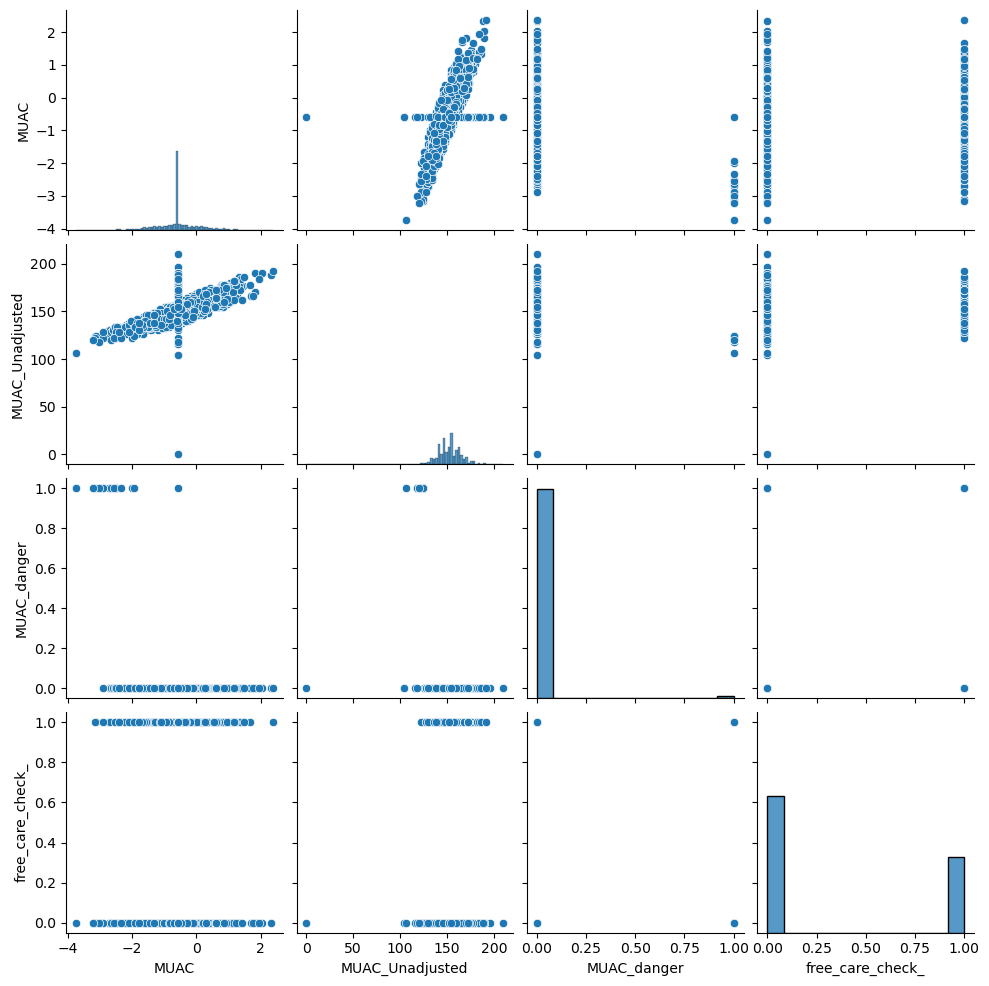

In [30]:
# 1. Pairplot to visualize relationships
sns.pairplot(df_sum[['MUAC', 'MUAC_Unadjusted', 'MUAC_danger', 'free_care_check_']])
plt.show()

=============================================================================================================
##### <span style="color :Red"> observation   
    MUAC and MUAC_Unadjusted are highly correlated (from the heatmap), drop one.

    Keep MUAC (original measurement)

    Drop MUAC_Unadjusted (since it’s highly correlated with MUAC)

    Drop MUAC_danger if it does not contribute significantly in model performance

In [82]:

df_sum.drop(["MUAC_Unadjusted"], axis=1, inplace=True)
print(" successfully sum up and drop")



 successfully sum up and drop


In [83]:

#------------------Find Columns with a Single Unique Value-------------------------

constant_cols = df_sum.nunique() == 1  # Identifies columns with only one unique value
constant_columns = df_sum.loc[:, constant_cols]  # Selects those columns
list_constant_columns = constant_columns.columns.tolist()
print("Columns with a single unique value:",list_constant_columns)



Columns with a single unique value: ['consent', 'RelsFA', 'ageunit']


In [84]:


#  drop it , becz column have same val ( eg: ageunit have only one val : "day")
df_sum.drop(list_constant_columns, axis=1, inplace=True)
  

In [85]:

# check the correlation between the age category

print(df_sum[["age_2014", "age_2014_2", "age_2014_3", "age_2014_4", "ageyear_2014", "agegroup_2014"]].corr())
print(df_sum[["age_2014", "age_2014_2", "age_2014_3", "age_2014_4", "ageyear_2014", "agegroup_2014"]].nunique())



               age_2014  age_2014_2  age_2014_3  age_2014_4  ageyear_2014  \
age_2014       1.000000    0.981263    0.936401    0.877014      1.000000   
age_2014_2     0.981263    1.000000    0.985719    0.949396      0.981263   
age_2014_3     0.936401    0.985719    1.000000    0.988230      0.936401   
age_2014_4     0.877014    0.949396    0.988230    1.000000      0.877014   
ageyear_2014   1.000000    0.981263    0.936401    0.877014      1.000000   
agegroup_2014  0.877983    0.799901    0.710287    0.620903      0.877983   

               agegroup_2014  
age_2014            0.877983  
age_2014_2          0.799901  
age_2014_3          0.710287  
age_2014_4          0.620903  
ageyear_2014        0.877983  
agegroup_2014       1.000000  
age_2014         832
age_2014_2       832
age_2014_3       832
age_2014_4       832
ageyear_2014     832
agegroup_2014      3
dtype: int64


##### <span style="color :Red"> observation   

#####  From the correlation matrix and unique values, we can make some observations:
✅ "age_2014" and "ageyear_2014" are identical (correlation = 1.0) → You can drop one.
✅ "age_2014_2", "age_2014_3", and "age_2014_4" are highly correlated with "age_2014" and have the same number of unique values → These are redundant.
✅ "agegroup_2014" has only 3 unique values, meaning it represents age categories rather than exact ages. You can keep it for categorical analysis.

##### Recommended Action

Keep: "age_2014" (or "ageyear_2014", since they are identical).

Drop: "age_2014_2", "age_2014_3", "age_2014_4", "ageyear_2014" (since they are redundant).

Option
ally Keep: "agegroup_2014" (if categorical age grouping is useful).

In [86]:

df_sum.drop(["age_2014_2", "age_2014_3", "age_2014_4", "ageyear_2014"], axis=1, inplace=True)
print(" successfully sum up and drop")



 successfully sum up and drop


In [87]:
utilization_cols = ['CSCOM_last_week', 'Hospital_last_week', 'Private_Clinic_last_week', 
                    'Traditional_last_week', 'Pharmacy_last_week', 'Pharmacy_Parterre_last_week']

# check the correlation between the utilization_cols

print(df_sum[['CSCOM_last_week', 'Hospital_last_week', 'Private_Clinic_last_week', 
                    'Traditional_last_week', 'Pharmacy_last_week', 'Pharmacy_Parterre_last_week']].corr())
print(df_sum[['CSCOM_last_week', 'Hospital_last_week', 'Private_Clinic_last_week', 
                    'Traditional_last_week', 'Pharmacy_last_week', 'Pharmacy_Parterre_last_week']].nunique())



                             CSCOM_last_week  Hospital_last_week  \
CSCOM_last_week                     1.000000           -0.005554   
Hospital_last_week                 -0.005554            1.000000   
Private_Clinic_last_week           -0.009632           -0.002102   
Traditional_last_week               0.043949           -0.005892   
Pharmacy_last_week                  0.000822            0.109244   
Pharmacy_Parterre_last_week         0.005863           -0.009116   

                             Private_Clinic_last_week  Traditional_last_week  \
CSCOM_last_week                             -0.009632               0.043949   
Hospital_last_week                          -0.002102              -0.005892   
Private_Clinic_last_week                     1.000000              -0.010218   
Traditional_last_week                       -0.010218               1.000000   
Pharmacy_last_week                           0.123168               0.022150   
Pharmacy_Parterre_last_week                

In [88]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(df_sum, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
# plt.title("Correlation Matrix of Healthcare Visits (Last Week)")
# plt.show()

##### <span style="color :Red"> observation   


Since the correlations between these healthcare facility visit features are low, summing them into one feature may not be the best approach

Means : KEEP SEPERATLY

ALTERNATIVE (pending)

from sklearn.decomposition import PCA
pca = PCA(n_components=1)  # Reduce to 1 component
df_clean['PCA_component'] = pca.fit_transform(df_clean[['CSCOM_last_week', 'Hospital_last_week', 
                                                       'Private_Clinic_last_week', 'Traditional_last_week', 
                                                       'Pharmacy_last_week', 'Pharmacy_Parterre_last_week']])
print("Explained variance ratio:", pca.explained_variance_ratio_)

In [89]:
df_sum.shape

(1652, 98)

In [90]:
print(df_sum[["TrtOrder", "TrtOrder2013"]].corr())
print(df_sum[["TrtOrder", "TrtOrder2013"]].nunique())

              TrtOrder  TrtOrder2013
TrtOrder      1.000000      0.972062
TrtOrder2013  0.972062      1.000000
TrtOrder        4
TrtOrder2013    4
dtype: int64


##### <span style="color :Red"> observation  

The correlation coefficient between TrtOrder and TrtOrder2013 is 0.972, which is very close to 1.

This indicates strong multicollinearity, meaning these two features contain almost the same information.

-------------------So i decided to drop one columns----------------------


Another way to find the corelation

    from scipy.stats import pointbiserialr
    corr, p_value = pointbiserialr(df_selected['TrtOrder'], df_selected['TrtOrder2013'])
    print(f"Point-Biserial Correlation: {corr}")
    print(f"P-value: {p_value}")



In [91]:
df_sum.drop(["TrtOrder2013"], axis=1, inplace=True)

In [92]:

df_sum.drop(["Treatment1", "Treatment2", "Treatment3", "Treatment4"], axis=1, inplace=True)
print(" successfully sum up and drop")


 successfully sum up and drop


##### <span style="color :Red"> Observations:
###### <span style="color :Red"> Why are columns [ "Treatment1", "Treatment2", "Treatment3", "Treatment4" removed???????

Treatment1 to Treatment4  are just one-hot encoded columns of TrtOrder.

So I'm leaving out columns Treatment1 to Treatment4 to avoid repetition/ redundancy.


In [93]:
print(df_sum[["tag_HH", "tag_C","tag_M"]].corr())
print(df_sum[["tag_HH", "tag_C","tag_M"]].nunique())

          tag_HH     tag_C     tag_M
tag_HH  1.000000  0.141530  0.212607
tag_C   0.141530  1.000000  0.183578
tag_M   0.212607  0.183578  1.000000
tag_HH    2
tag_C     2
tag_M     2
dtype: int64


##### <span style="color :Red"> observation  
tag_HH, tag_C, and tag_M are weakly correlated (max correlation ~0.21).

No strong multicollinearity (correlation > 0.8), so dropping any one feature is not strictly necessary.

The value counts suggest that each variable has two unique values (binary: 0 or 1)

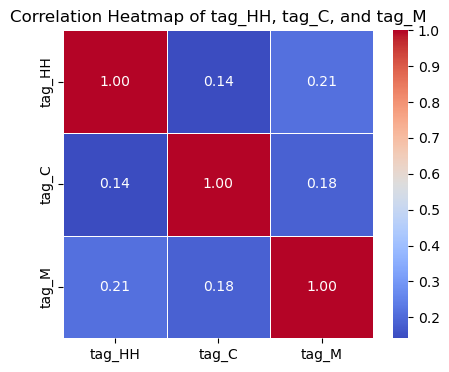

In [94]:
# Compute correlation matrix for categorical variables
corr_matrix = df_sum[['tag_HH', 'tag_C', 'tag_M']].corr()

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of tag_HH, tag_C, and tag_M")
plt.show()

In [95]:

#.....................check missing values  after cleaning............................................

missing_values = df_sum.isnull().sum()
print(missing_values[missing_values > 0])  # Show only columns with missing values


Series([], dtype: int64)


In [96]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 93 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FPrimary                      1652 non-null   int64  
 1   Person_ID                     1652 non-null   int64  
 2   compound                      1652 non-null   int64  
 3   Mother_ID                     1652 non-null   int64  
 4   surveyor_ID                   1652 non-null   int64  
 5   child_consent_                1652 non-null   float64
 6   TrtOrder                      1652 non-null   float64
 7   AttrStatus                    1652 non-null   float64
 8   same_compound                 1652 non-null   float64
 9   same_mother                   1652 non-null   float64
 10  Stratum                       1652 non-null   int64  
 11  HHmembers_12                  1652 non-null   float64
 12  GenderFA                      1652 non-null   float64
 13  Lit

In [97]:
df_sum.shape

(1652, 93)

In [98]:
#list(df_sum.columns)

### <span style="color :#b407f5"> Handling Outlier

In [100]:
df_outlier  = df_sum.copy()

##### <span style="color :Green">  Check Skewness

In [101]:
#---------------------------------- Check Skewness------------------------------

# Select numerical columns
numerical_cols = df_outlier.select_dtypes(include=['number']).columns

# Drop 'free_care_check_' if it exists
if 'free_care_check_' in numerical_cols:
    numerical_cols = numerical_cols.drop('free_care_check_')

# Compute skewness for each numerical column (apply on actual data)
skewness_values = df_outlier[numerical_cols].skew()

# Print skewness
print(skewness_values)


FPrimary            5.479892
Person_ID           4.114071
compound            5.480004
Mother_ID           4.138802
surveyor_ID         0.185444
                      ...   
Polio_Total        -6.262710
DTCoq_Total        -5.469483
HepatitisB_Total   -4.478416
Hib_Total          -4.288561
Other_Vaccines     -3.238238
Length: 92, dtype: float64


#### <span style="color :Red"> Observation

our dataset has highly skewed features because many values exceed ±1, meaning the distribution is not symmetric


##### <span style="color :blue"> Univariate Analysis (Distribution of Each Feature)

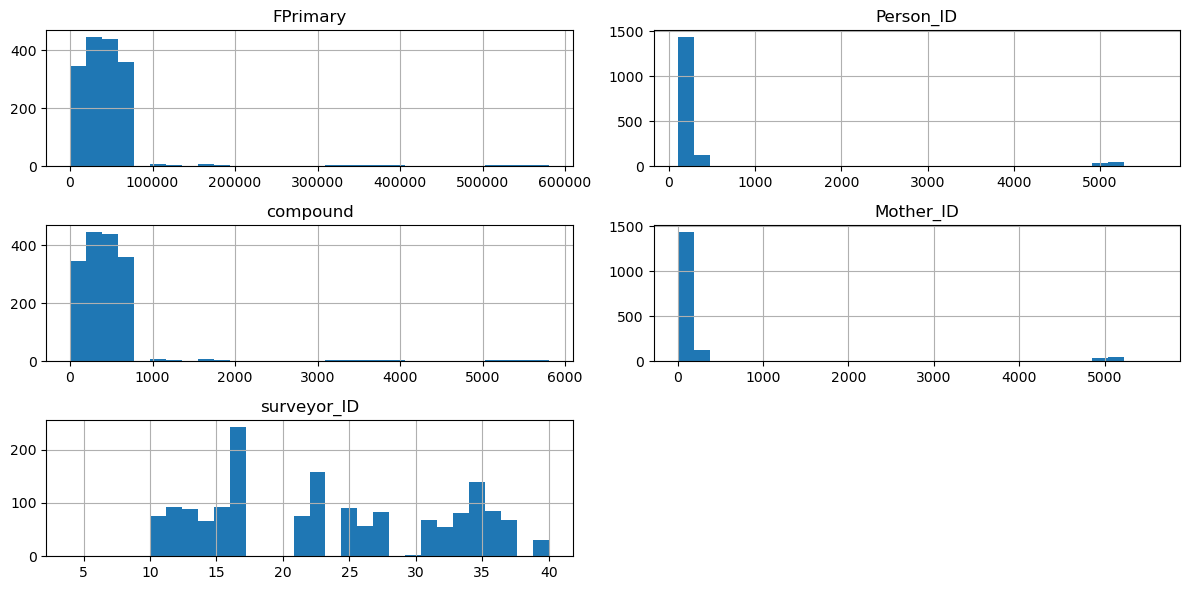

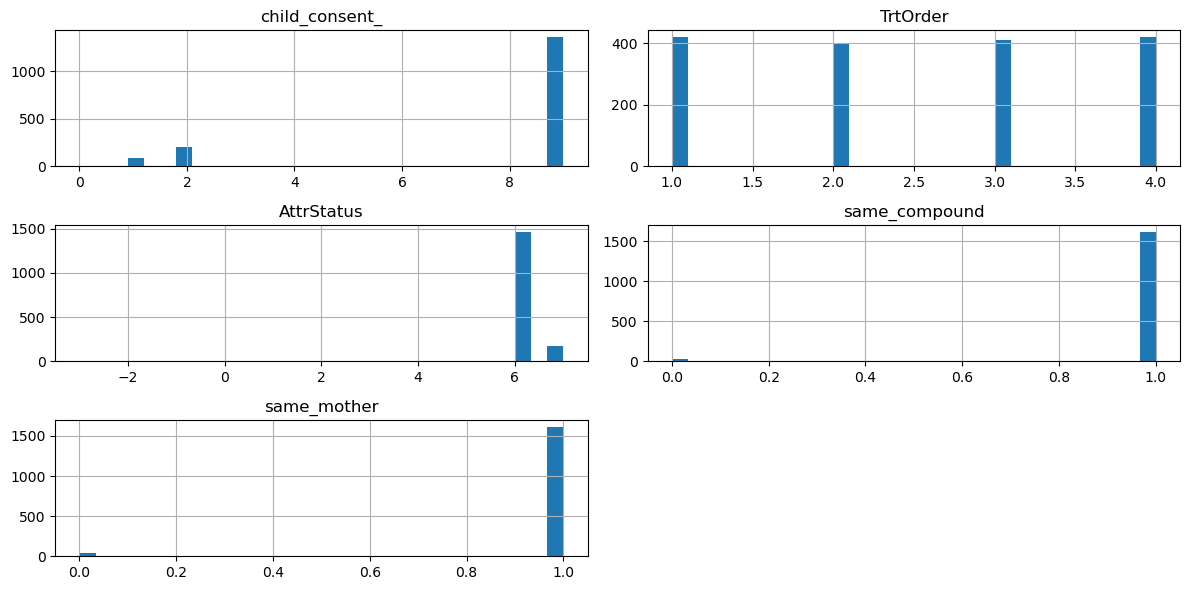

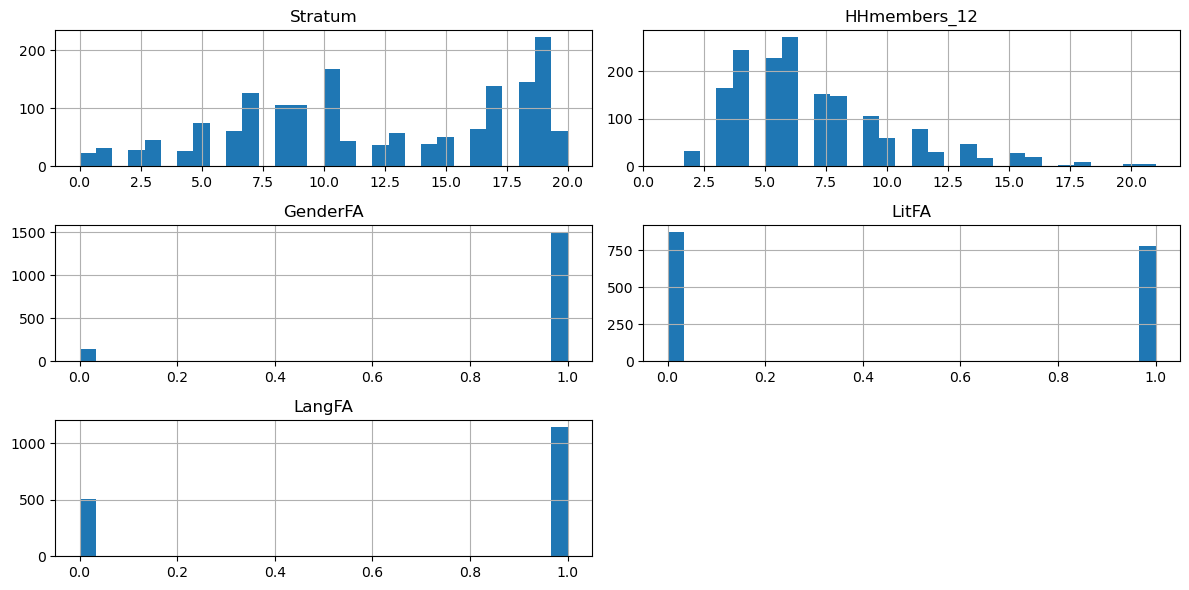

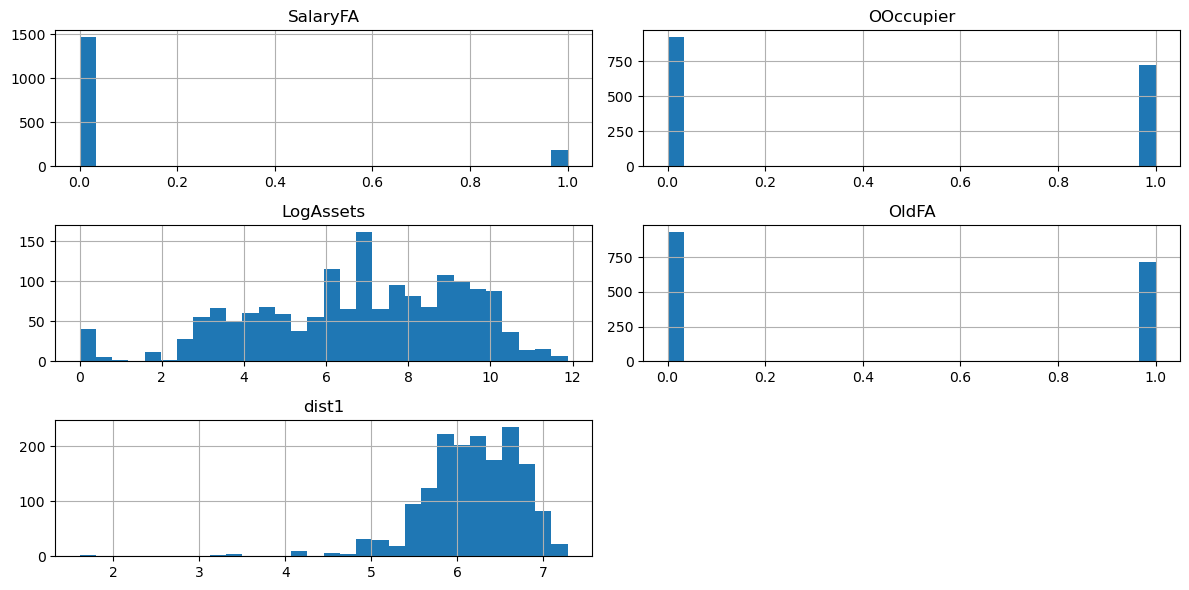

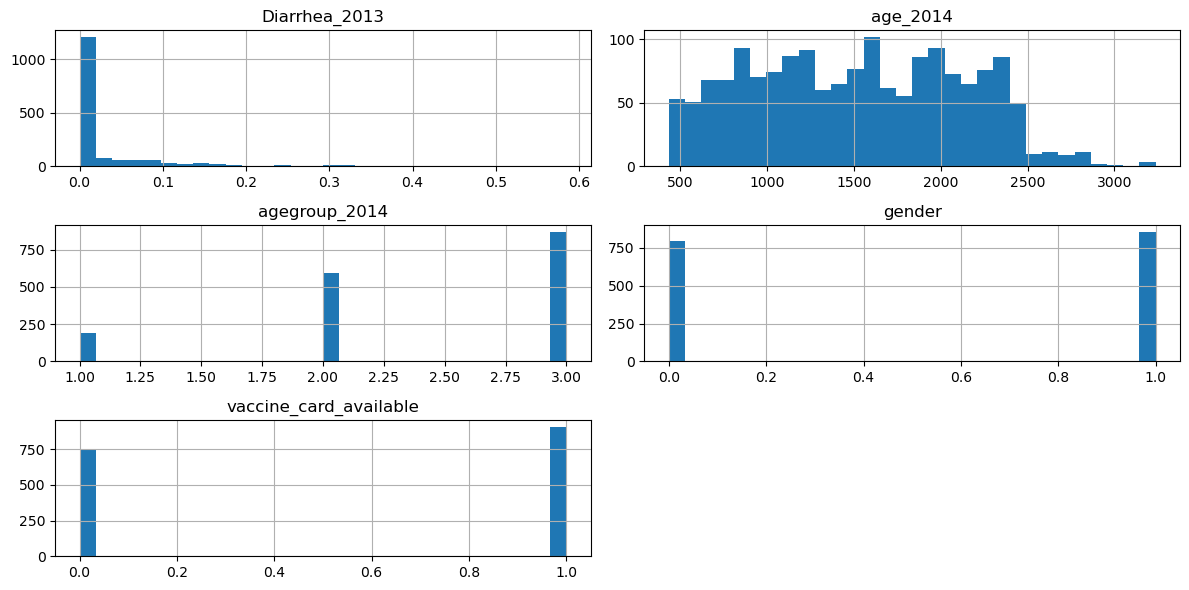

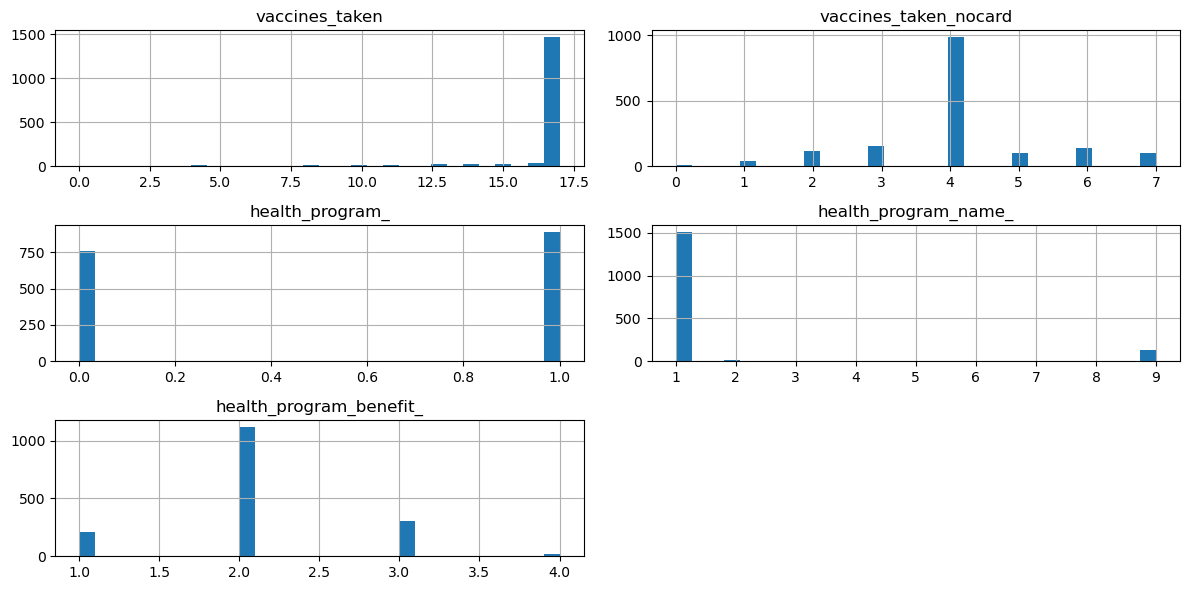

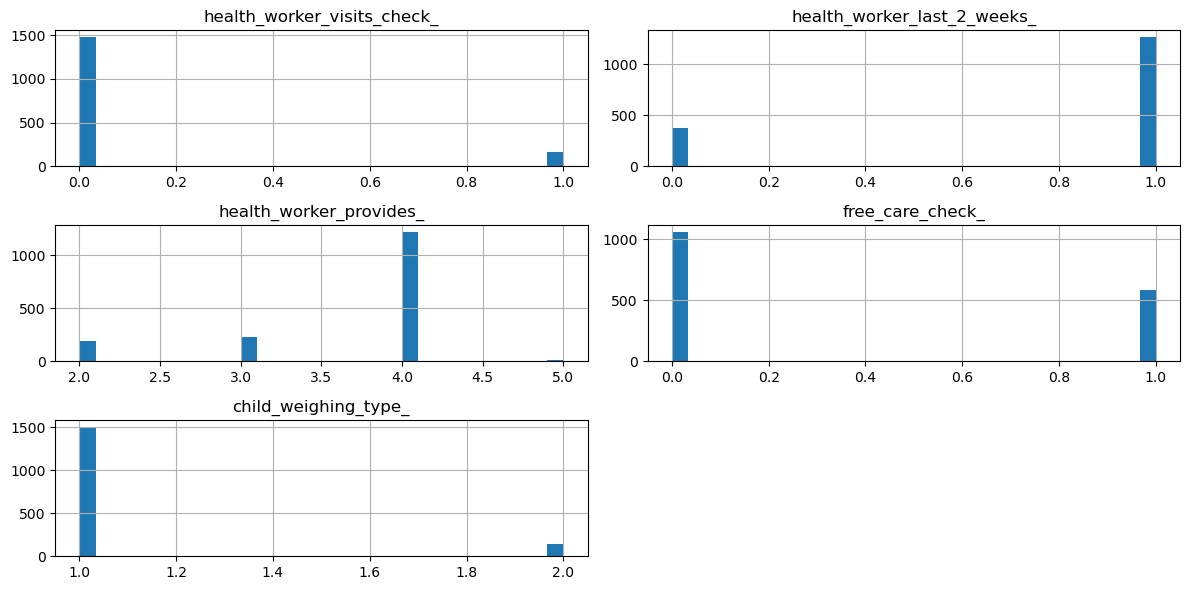

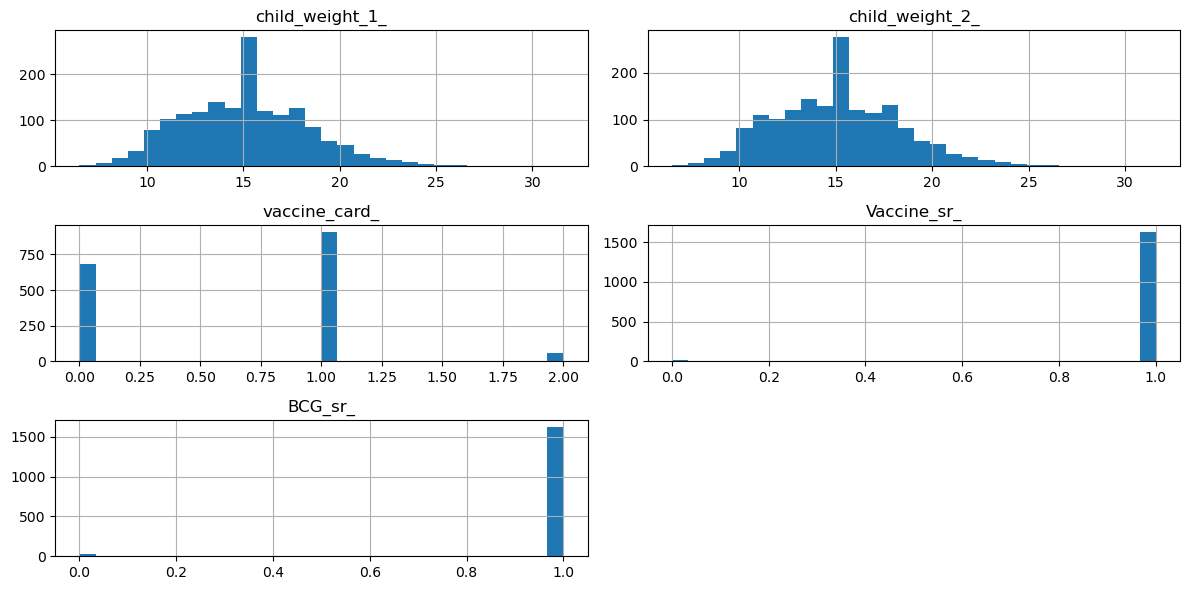

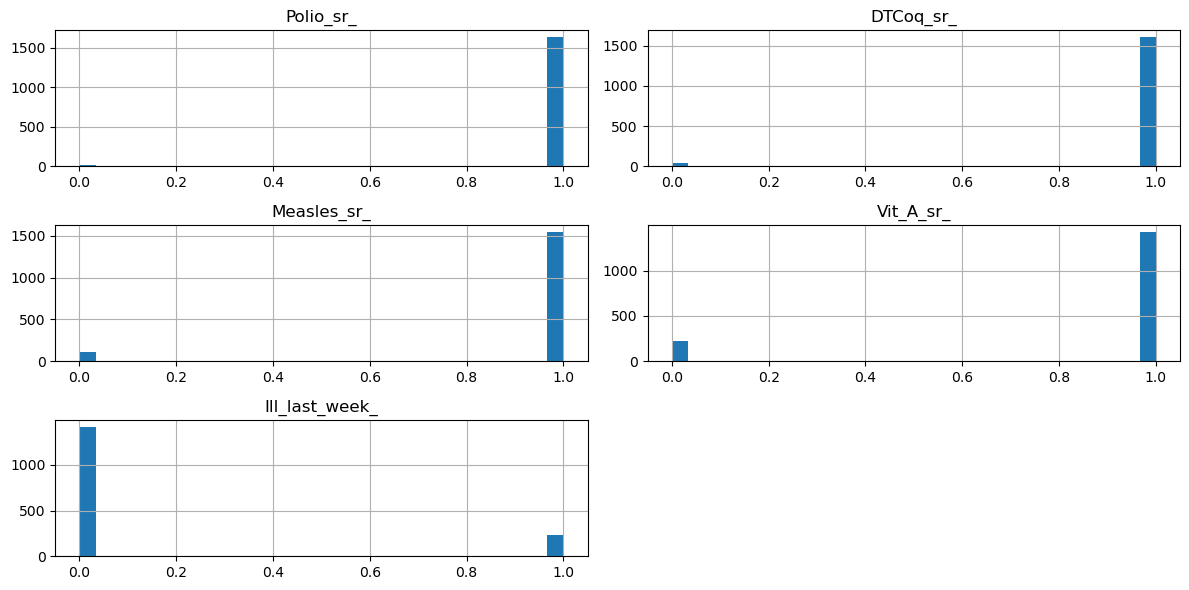

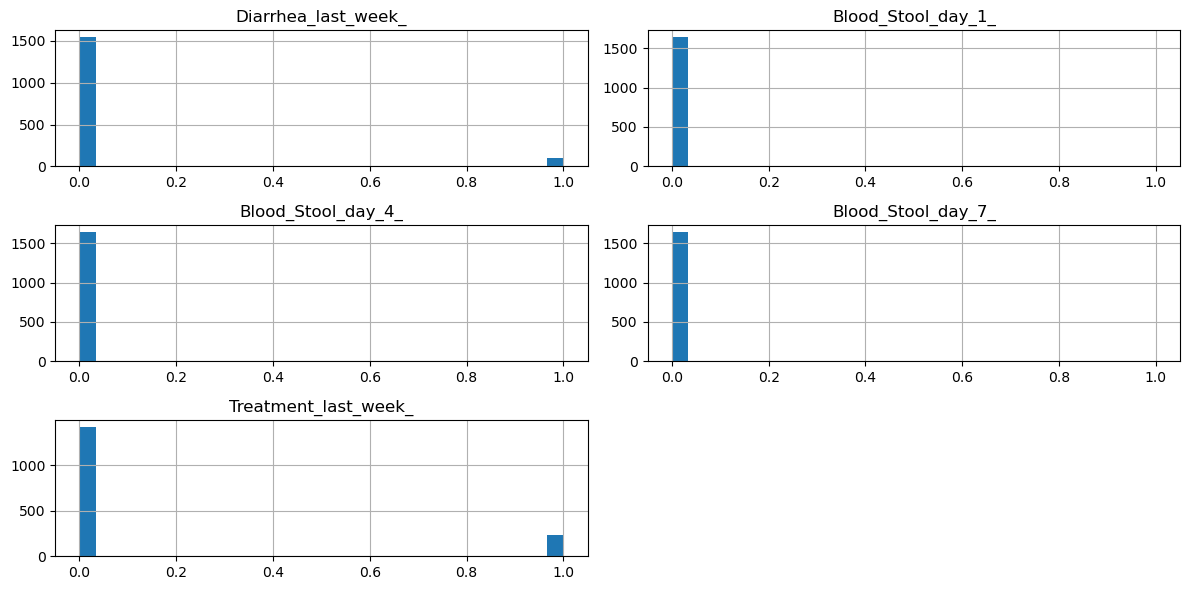

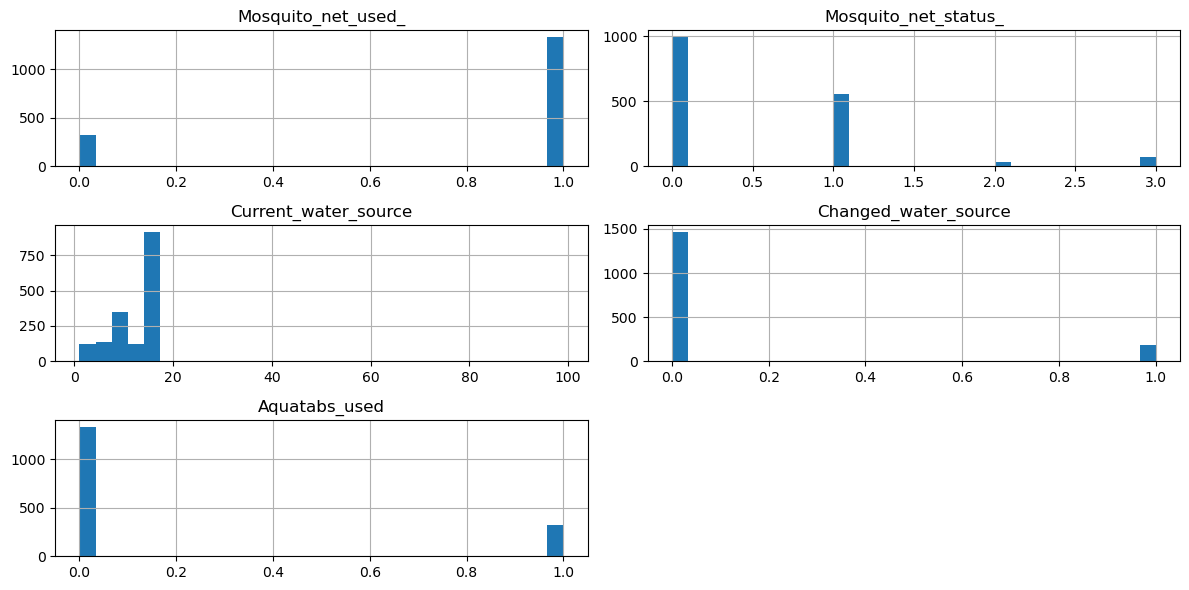

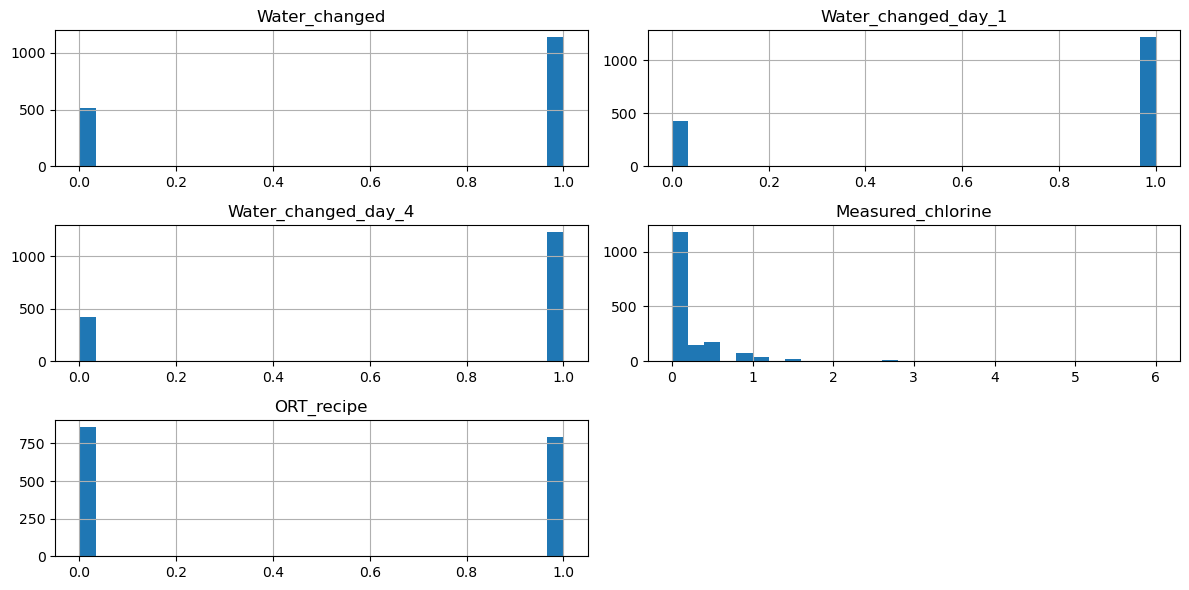

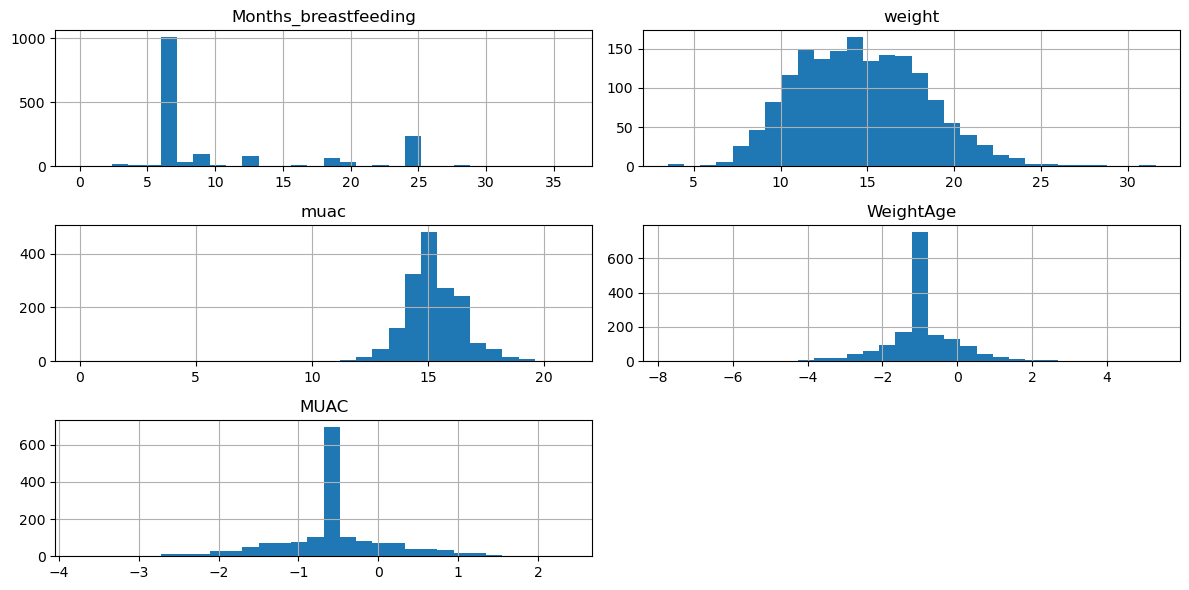

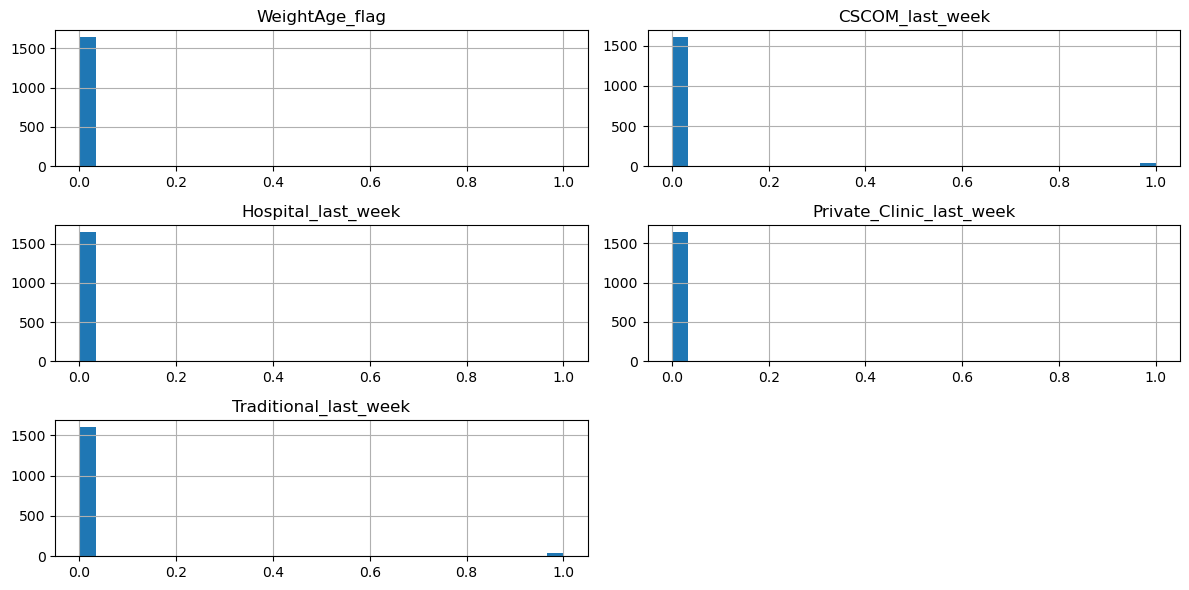

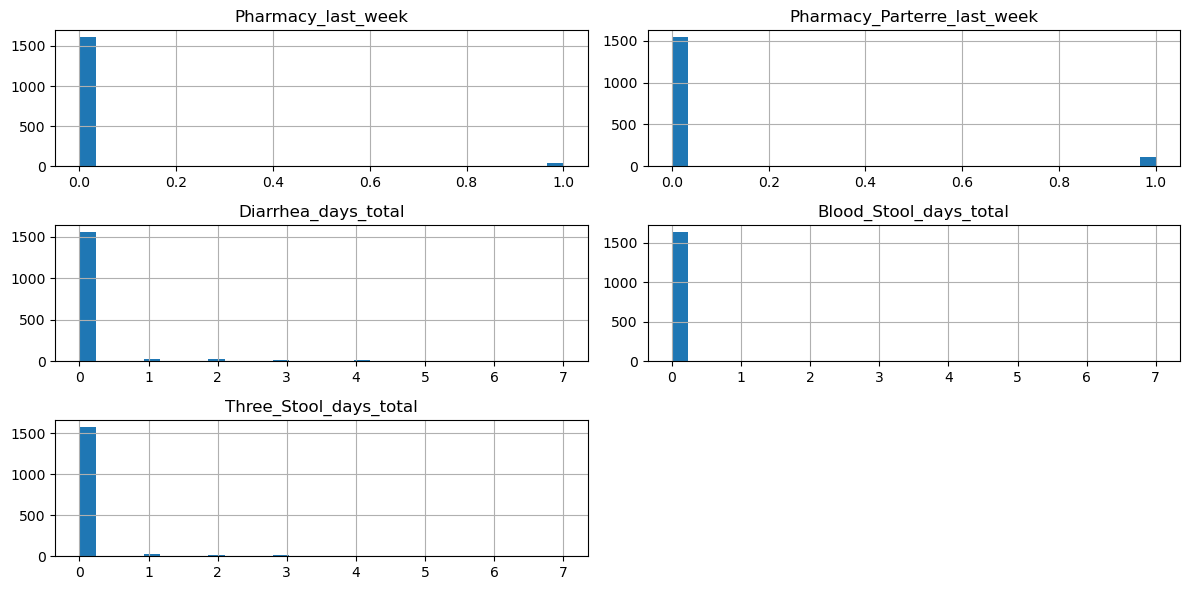

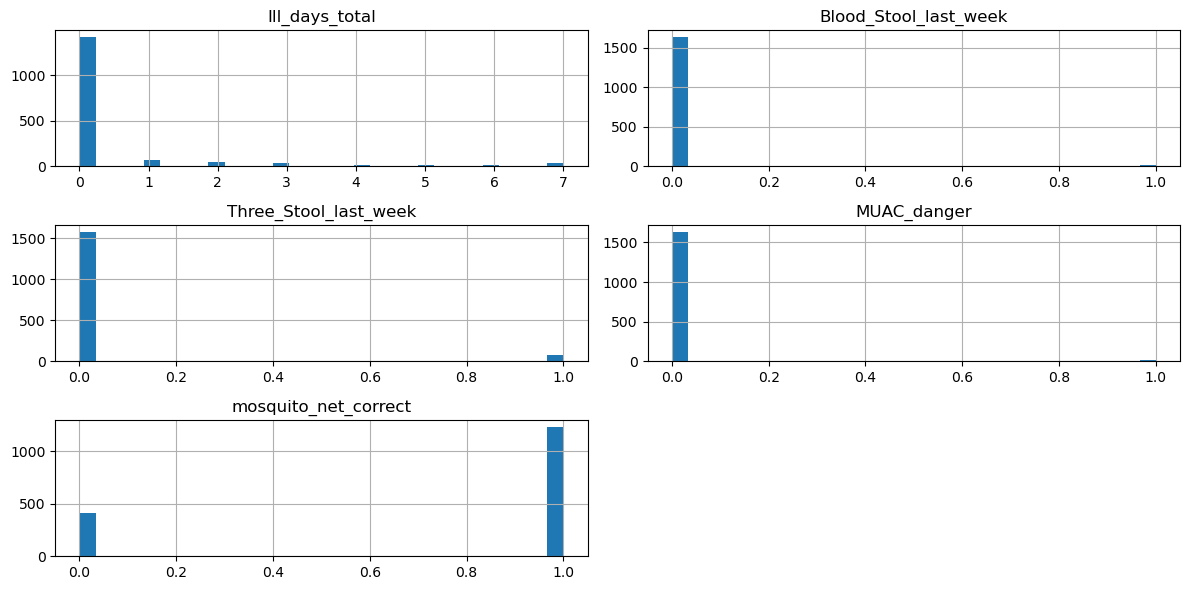

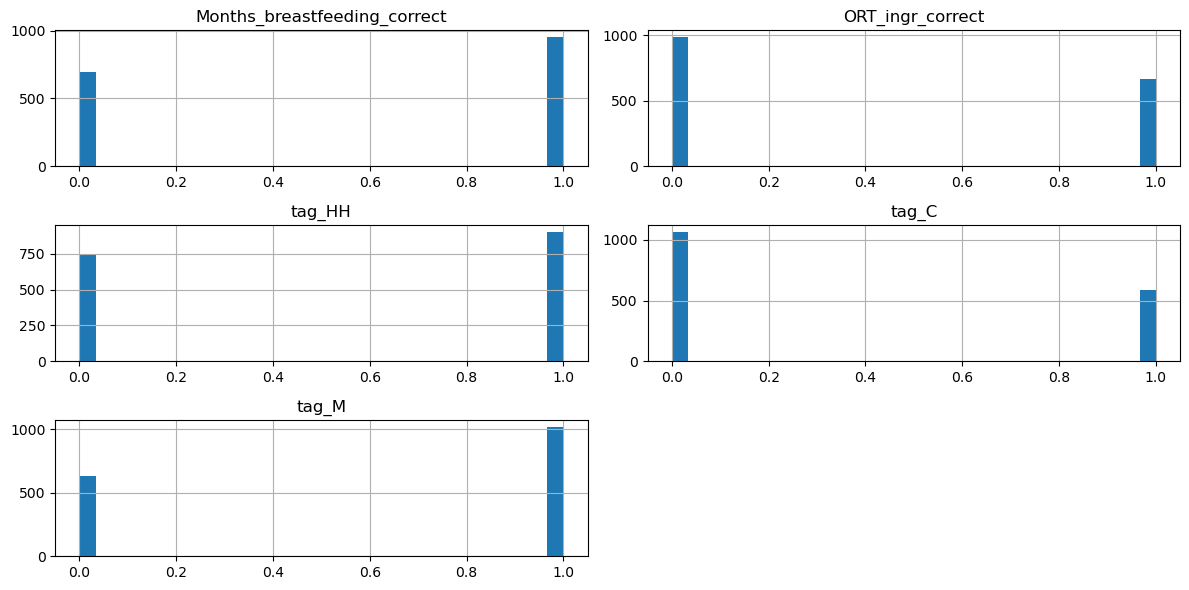

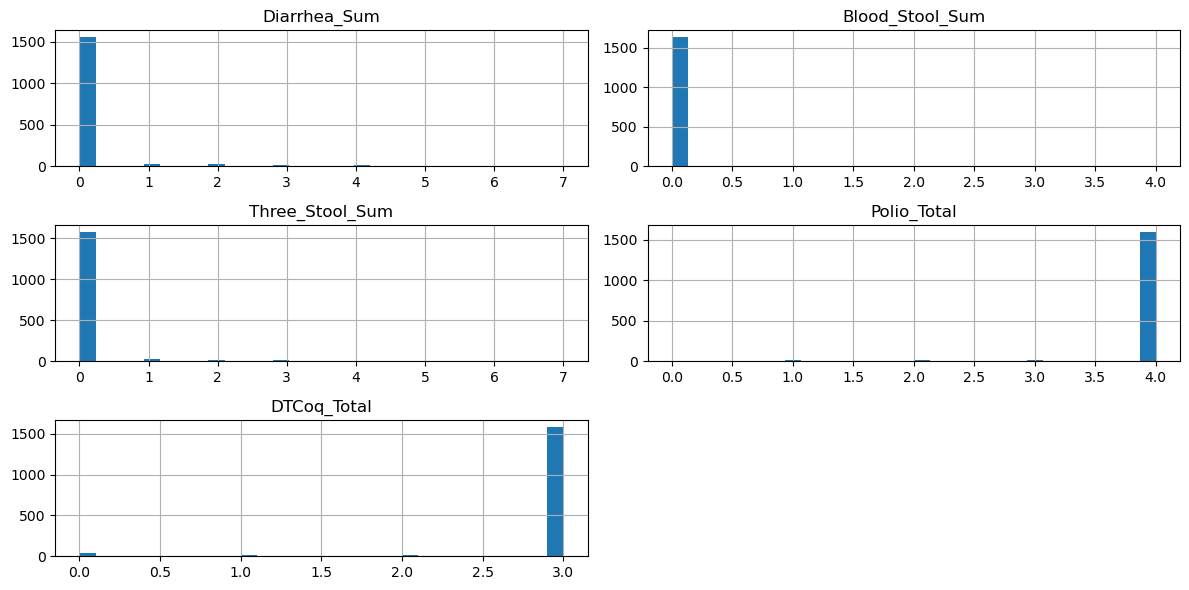

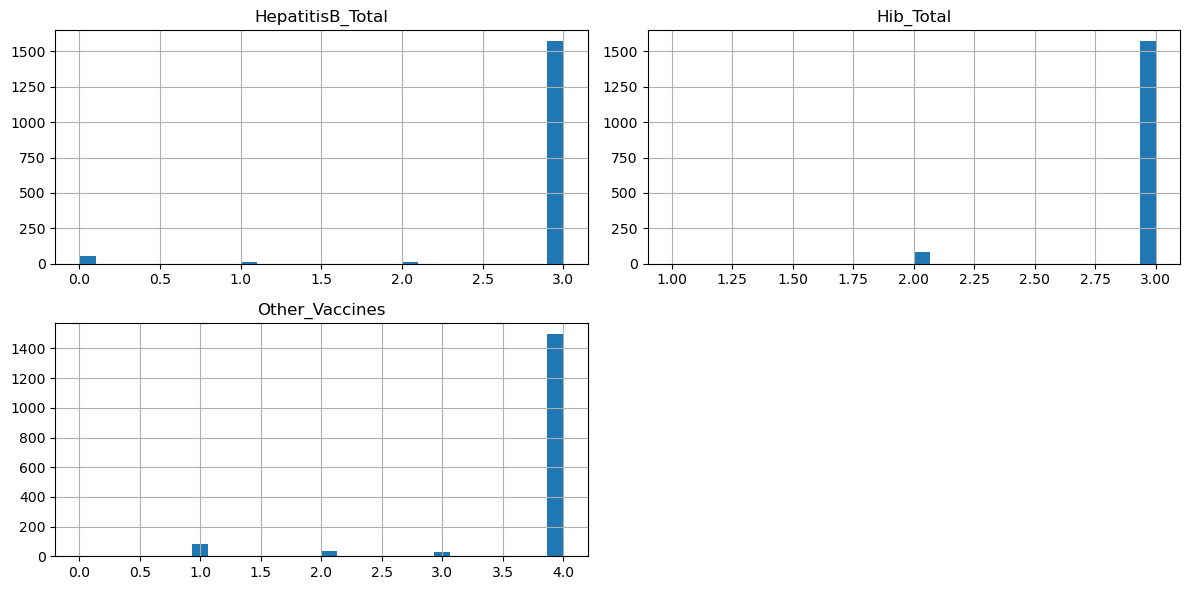

In [258]:
# Univariate Analysis (Distribution of Each Feature)
# Select only numerical columns
numerical_cols = df_outlier.select_dtypes(include=['number']).columns

# Plot in batches of 5
for i in range(0, len(numerical_cols), 5):
    subset = numerical_cols[i:i+5]  # Select a batch of 5 columns
    df_sum[subset].hist(figsize=(12, 6), bins=30)
    plt.tight_layout()
    plt.show()

#### <span style="color :Green">  checking the outlier count

In [102]:
#-----------------------------normal distribution---------------------------------------

from scipy.stats import zscore, skew

def detect_outliers_normal(df):
    # Select numeric columns
    num_cols = df.select_dtypes(include=['number']).columns

    # Compute Skewness & Identify Normally Distributed Features (|skew| < 1)
    skewness = df[num_cols].apply(lambda x: skew(x.dropna()))
    normal_features = skewness[abs(skewness) < 1].index.tolist()

    # Compute Z-score for normally distributed features
    z_scores = df[normal_features].apply(zscore)

    # Identify outliers where |Z| > 3
    outlier_counts = (z_scores.abs() > 3).sum()

    # Get list of normal features that have outliers
    outlier_features = outlier_counts[outlier_counts > 0].index.tolist()

    return outlier_features

# Detect outliers in normally distributed features
outlier_columns = detect_outliers_normal(df_outlier)
print("Normally distributed features with outliers:", outlier_columns)


Normally distributed features with outliers: ['vaccines_taken_nocard', 'health_program_benefit_', 'child_weight_1_', 'child_weight_2_', 'weight', 'muac', 'WeightAge', 'MUAC']


In [103]:
# .................... this is the function checking the outlier count(IQR BASED) ..............................................

def count_outliers_iqr(df_data):
    """
    Computes the number of outliers in each numerical column using the IQR method.
    
    Parameters:
        df_data (pd.DataFrame): The input DataFrame containing numerical features.
    
    Returns:
        pd.Series: Outlier count per column, sorted in descending order.
    """
    # Compute IQR
    Q1 = df_data.quantile(0.25)
    Q3 = df_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = (df_data < (Q1 - 1.5 * IQR)) | (df_data > (Q3 + 1.5 * IQR))
    
    # Count outliers per column
    outliers_count = outliers.sum()
    
    # Keep only columns where outliers exist
    outliers_count = outliers_count[outliers_count > 0]
    
    return outliers_count.sort_values(ascending=False)

# Example usage:
# outlier_counts = count_outliers_iqr(df)
# print(outlier_counts)


In [104]:

# --------------------call count_outliers_iqr () for outlier count----------------------
outliers_count = count_outliers_iqr(df_outlier)
print("Columns with Outliers and Their Counts:")
print(outliers_count)


Columns with Outliers and Their Counts:
vaccines_taken_nocard          662
health_program_benefit_        532
health_worker_last_2_weeks_    380
Mosquito_net_used_             320
Aquatabs_used                  319
                              ... 
Blood_Stool_day_7_               5
Current_water_source             5
Blood_Stool_day_1_               4
WeightAge_flag                   4
Hospital_last_week               2
Length: 67, dtype: int64


##### <span style="color :red"> OBSERVATION 

We have identified 67 columns with outliers

so Use IQR if your data is skewed or has extreme outliers

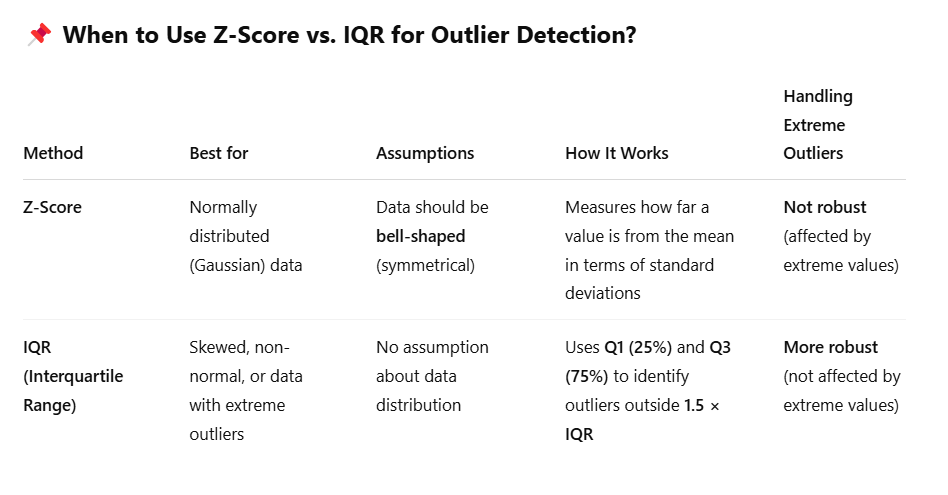

##### <span style="color :blue"> Univariate Analysis (Outlier)

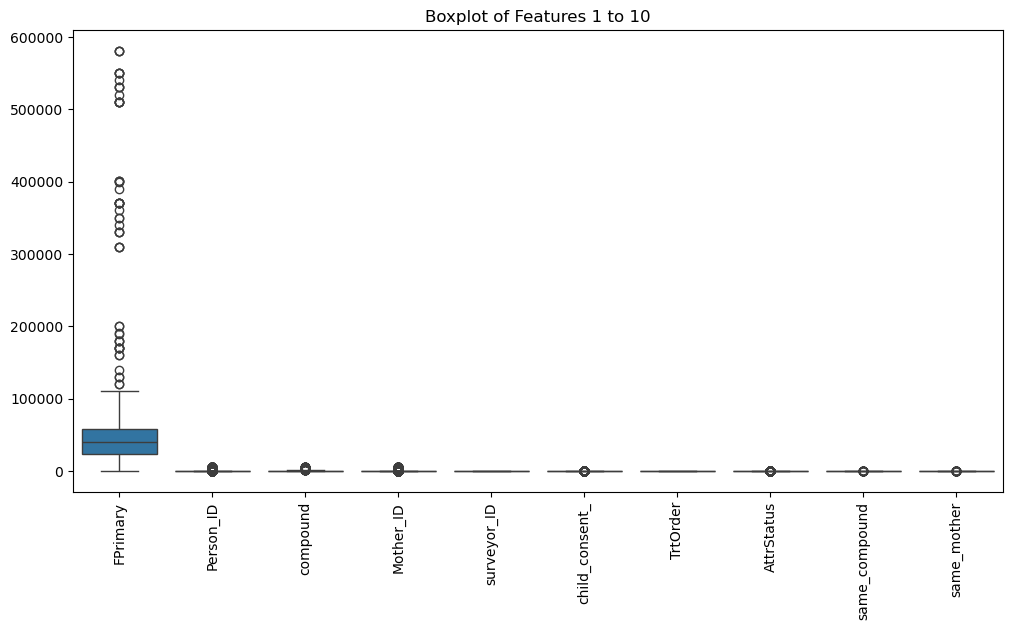

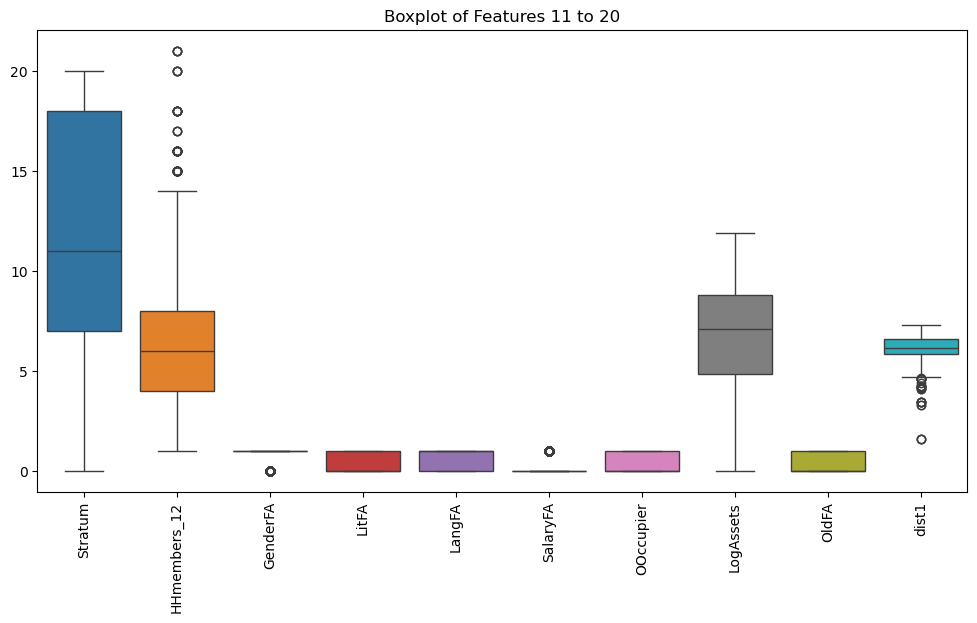

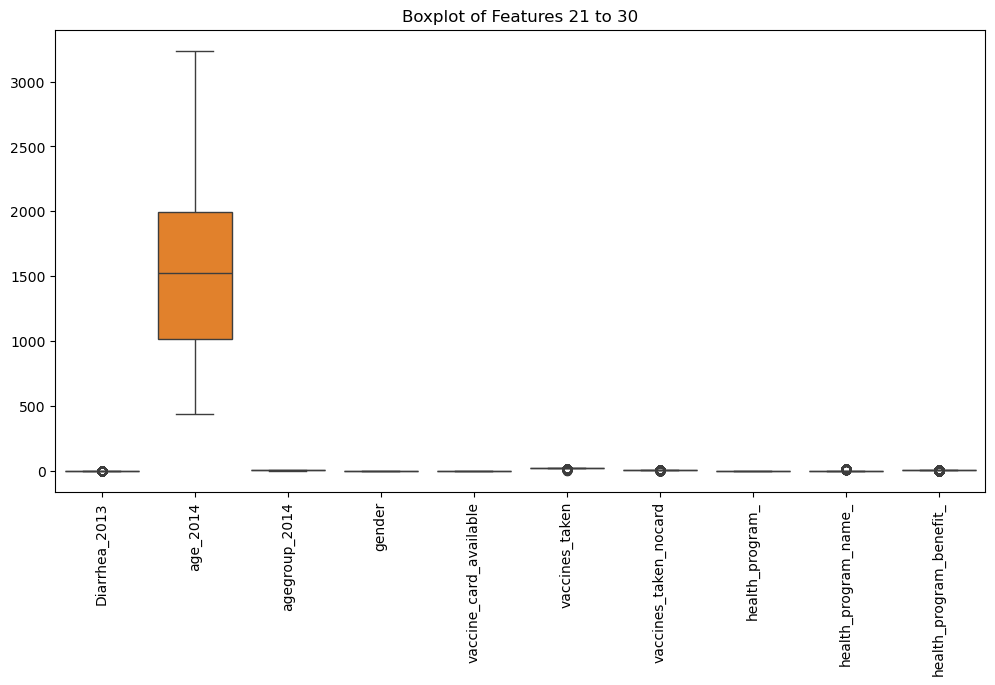

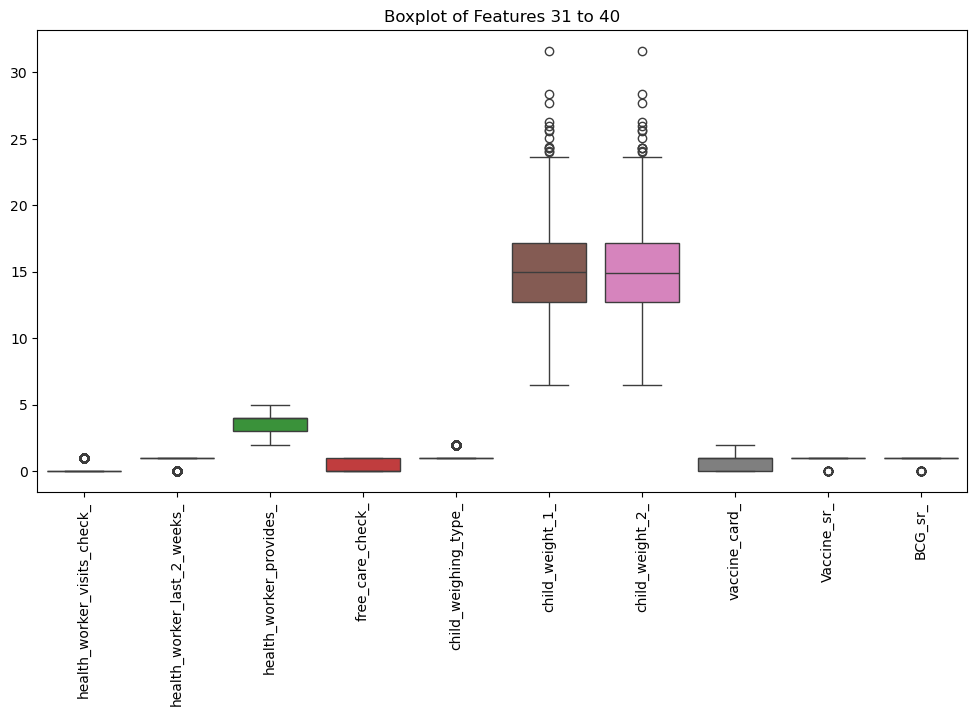

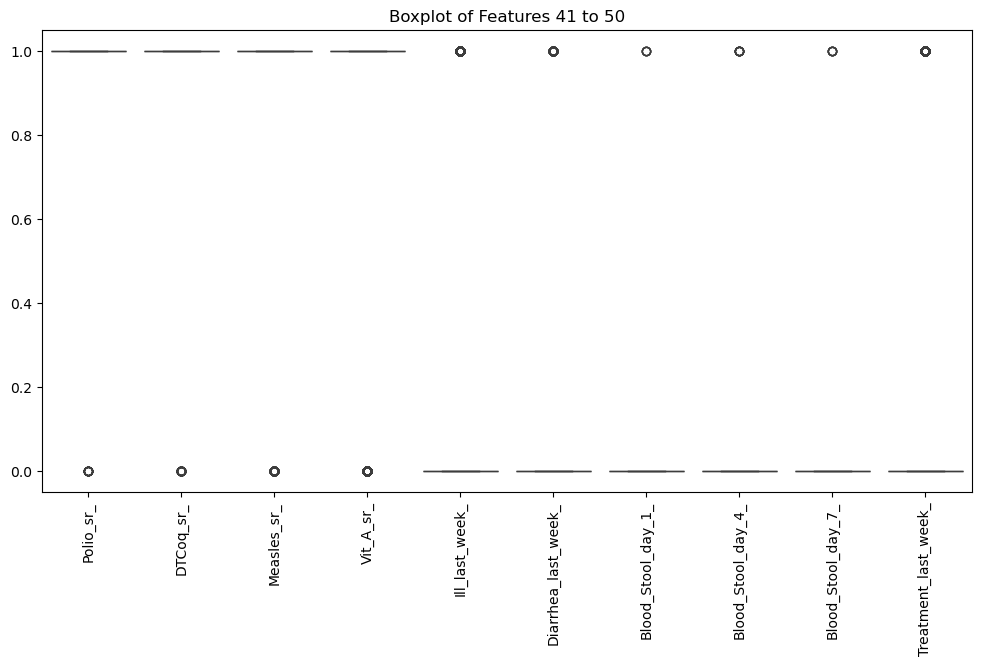

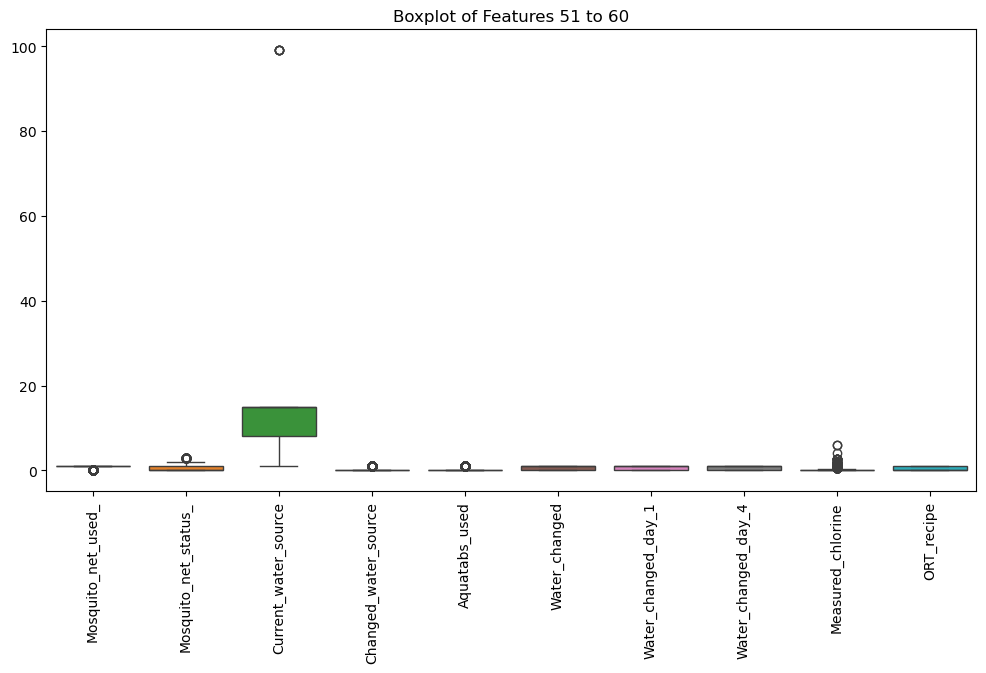

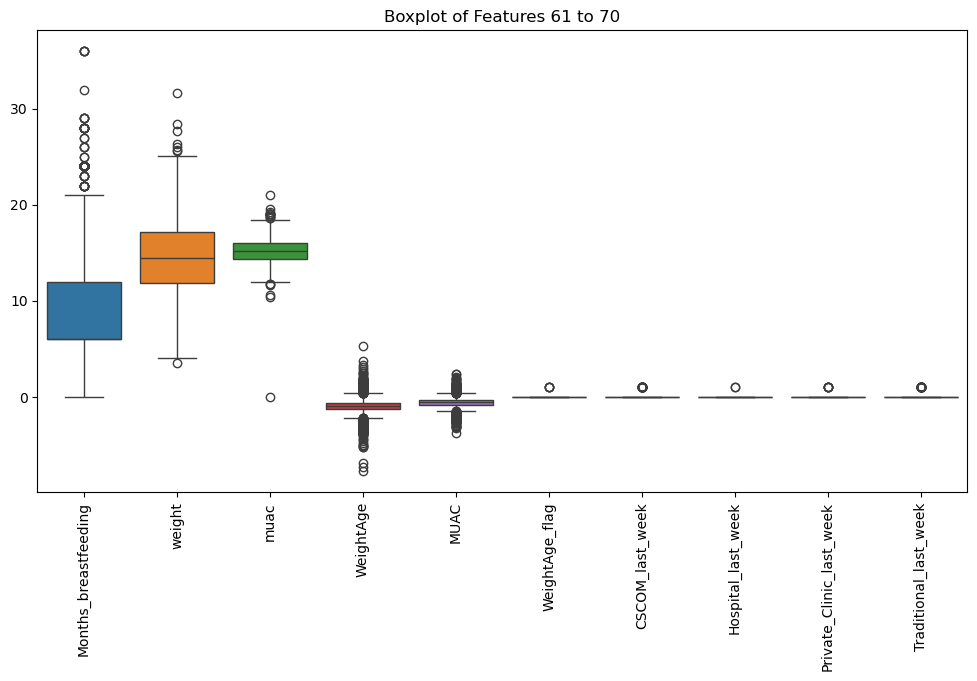

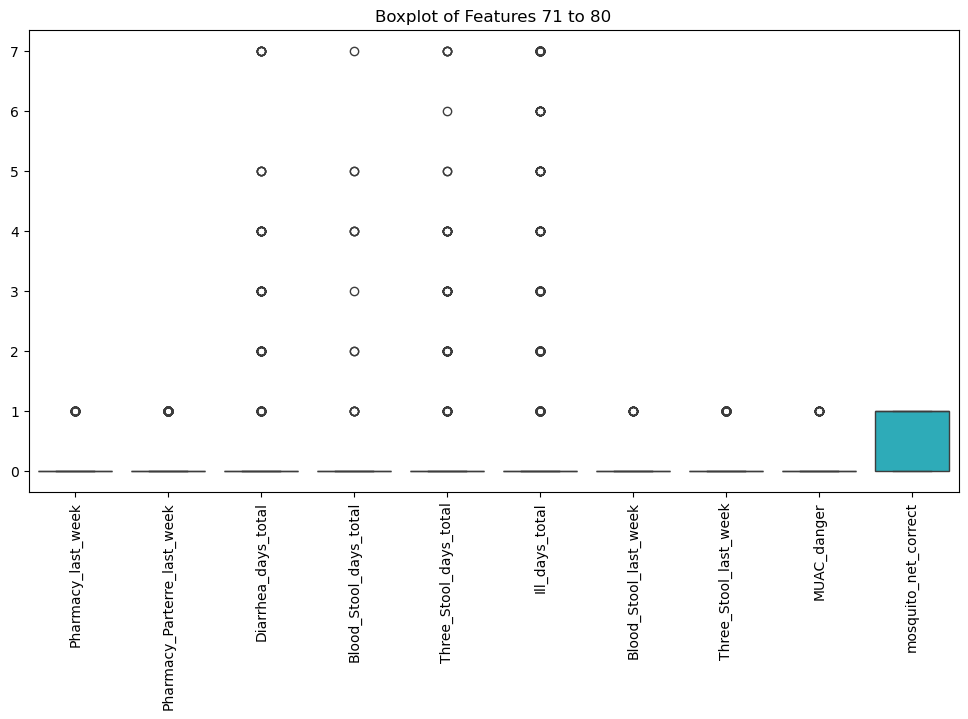

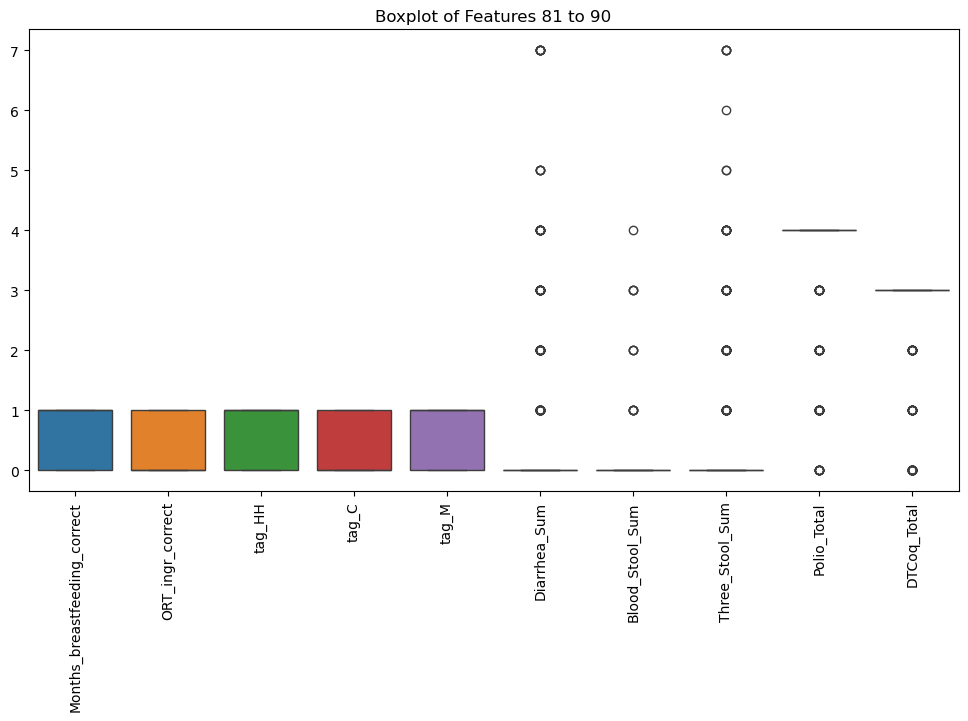

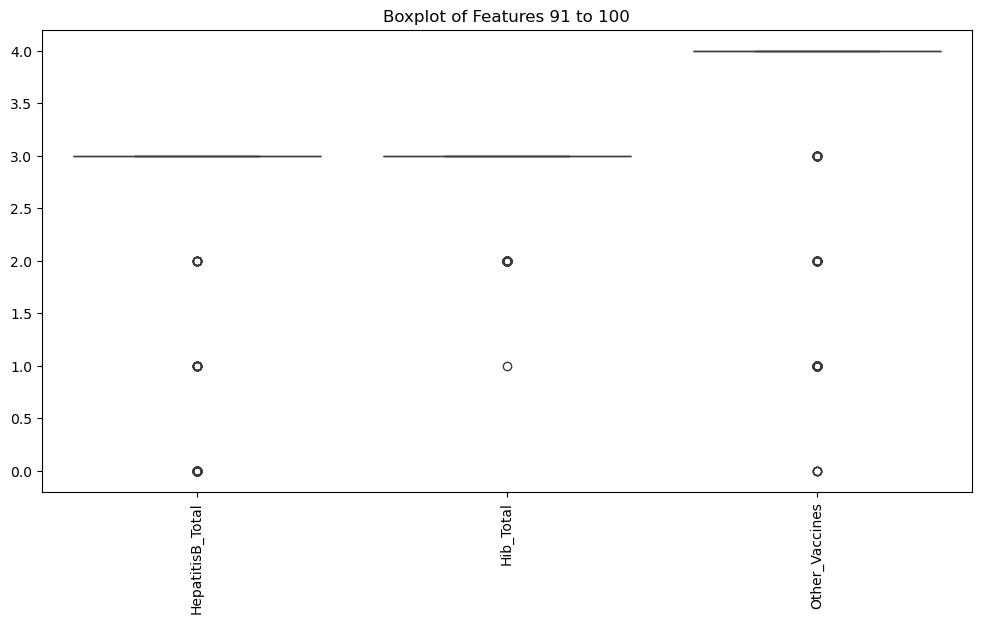

In [261]:
# Select numerical columns
numeric_cols = df_outlier.select_dtypes(include=['number'])

# Split into groups (e.g., 10 features per plot)
group_size = 10
for i in range(0, len(numeric_cols.columns), group_size):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=numeric_cols.iloc[:, i:i+group_size])
    plt.xticks(rotation=90)
    plt.title(f"Boxplot of Features {i+1} to {i+group_size}")
    plt.show()


#### <span style="color :Green"> IQR based Capping  (Cap Extreme Values (Winsorization))

In [105]:
#skwed fetures

Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outlier = df_outlier.clip(lower=lower_bound, upper=upper_bound, axis=1)


# ------------------Why?¶----------------------------------------
# Some outliers aren't errors but are too extreme, which can distort model performance.

# Instead of removing them, we limit (cap) them to a certain threshold.(by using IQR based CApping)

In [106]:
#--------------------------Check whether outliers have been handled or not--------------------------------

# call count_outliers_iqr () for outlier count
outliers_count = count_outliers_iqr(df_outlier)
print("Columns with Outliers After Capping and Their Counts:")
print(outliers_count)


Columns with Outliers After Capping and Their Counts:
Series([], dtype: int64)


In [110]:

#normal distributed fetaure
from scipy import stats

# Define a threshold for Z-score
z_threshold = 3

# Compute Z-scores for the selected features
z_scores = df_outlier[outlier_columns].apply(stats.zscore)

# Filter out rows where Z-score exceeds the threshold
df_outlier = df_outlier[(z_scores.abs() < z_threshold).all(axis=1)]


In [113]:
# ------------------------- check whether outlier handled or not ......................
import warnings
warnings.filterwarnings('ignore')

# Detect outliers in normally distributed features
outlier_columns = detect_outliers_normal(df_outlier)
print("Normally distributed features with outliers:", outlier_columns)

Normally distributed features with outliers: []


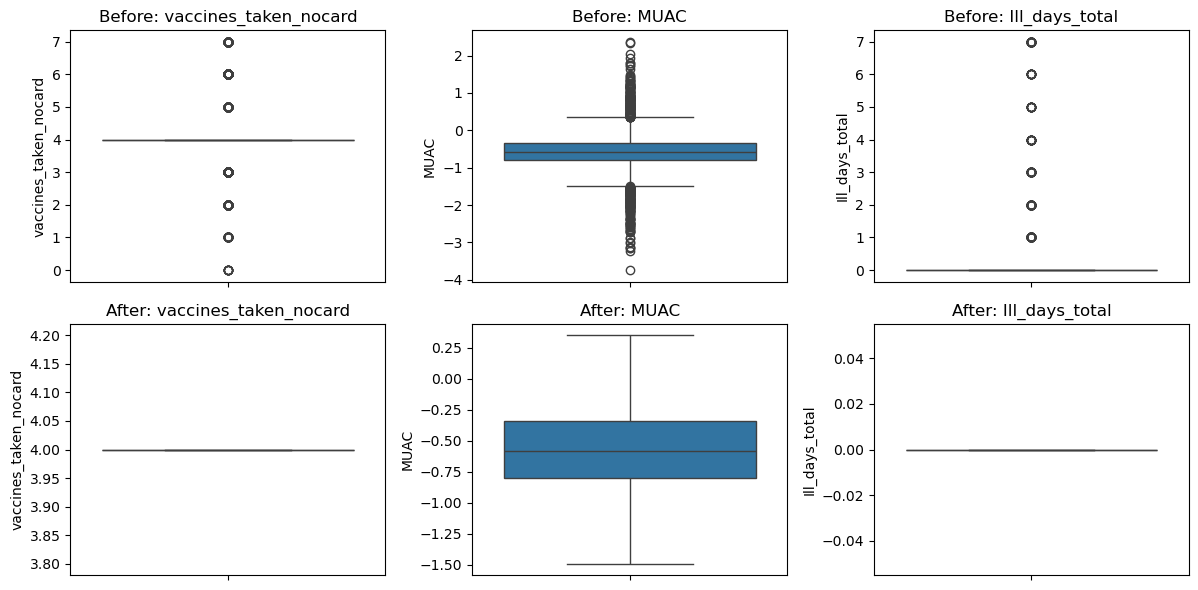

In [114]:
#-------------------------------Outlier visualization -----------------------------------------------------------

# Select a few key numeric columns with high outlier counts
key_cols = ['vaccines_taken_nocard', 'MUAC', 'Ill_days_total']  # Adjust based on your data

# If you have the original data (df_outlier_original)
if 'df_sum' in globals():
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(key_cols, 1):
        plt.subplot(2, len(key_cols), i)
        sns.boxplot(data=df_sum[col])
        plt.title(f"Before: {col}")
        
        plt.subplot(2, len(key_cols), i + len(key_cols))
        sns.boxplot(data=df_outlier[col])
        plt.title(f"After: {col}")
    plt.tight_layout()
    plt.show()
else:
    # Only after capping
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_outlier[key_cols])
    plt.title("Box Plots After Outlier Capping")
    plt.xticks(rotation=45)
    plt.show()

### <span style="color :#b407f5"> Encoding

In [115]:

df_encoder = df_outlier.copy()


In [116]:
print(df_encoder.dtypes)
print("\nObject columns:\n", df_encoder.select_dtypes(include=['object']).columns)


FPrimary            float64
Person_ID             int64
compound            float64
Mother_ID             int64
surveyor_ID           int64
                     ...   
Polio_Total         float64
DTCoq_Total         float64
HepatitisB_Total    float64
Hib_Total           float64
Other_Vaccines      float64
Length: 93, dtype: object

Object columns:
 Index([], dtype='object')


### <span style="color :#b407f5"> Resampling (If Imbalanced Data)

In [118]:

df_resample = df_encoder.copy()


In [119]:
df_resample.shape

(1646, 93)

In [122]:

import warnings
warnings.filterwarnings('ignore')



from imblearn.over_sampling import SMOTE

# Your resampling code
df_resample = df_outlier.copy()
X = df_resample.drop('free_care_check_', axis=1)
y = df_resample['free_care_check_']

print(y.unique())
print(y.dtype)
print("Before resampling:\n", y.value_counts())
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resample = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                         pd.Series(y_resampled, name='free_care_check_')], axis=1)
print("After resampling:\n", df_resample['free_care_check_'].value_counts())



[0. 1.]
float64
Before resampling:
 free_care_check_
0.0    1060
1.0     586
Name: count, dtype: int64
After resampling:
 free_care_check_
0.0    1060
1.0    1060
Name: count, dtype: int64


In [123]:
df_resample.shape

(2120, 93)

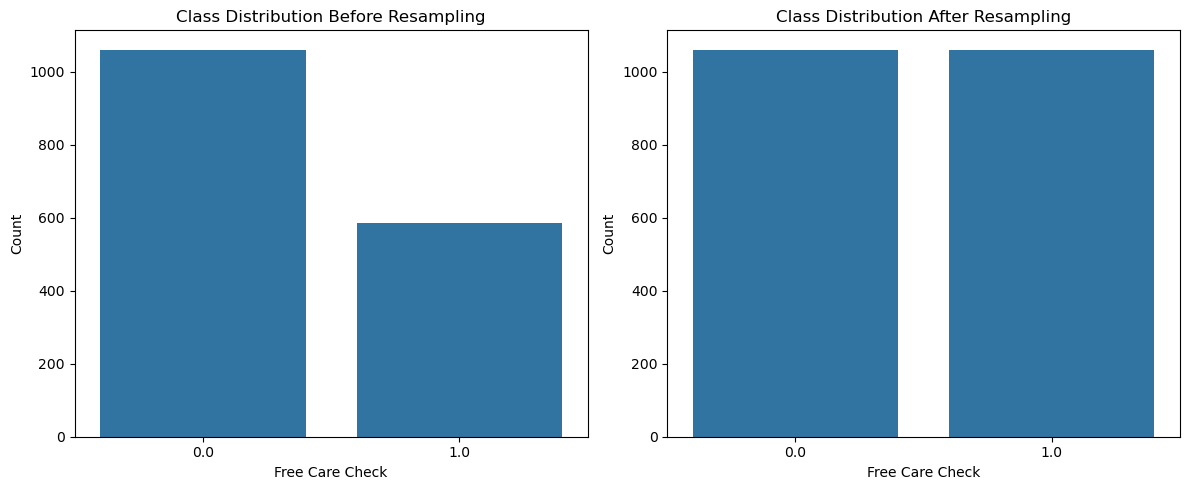

In [124]:
# Assuming you have the original df_outlier and resampled df_resample
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before resampling (from df_outlier)
sns.countplot(x='free_care_check_', data=df_outlier, ax=axes[0])
axes[0].set_title('Class Distribution Before Resampling')
axes[0].set_xlabel('Free Care Check')
axes[0].set_ylabel('Count')

# After resampling (from df_resample)
sns.countplot(x='free_care_check_', data=df_resample, ax=axes[1])
axes[1].set_title('Class Distribution After Resampling')
axes[1].set_xlabel('Free Care Check')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### <span style="color :#b407f5"> Feature Selection (Reduce Dimensionality)

In [125]:

df_selected = df_resample .copy()


In [126]:
df_selected.head(10)

,FPrimary,Person_ID,compound,Mother_ID,surveyor_ID,child_consent_,TrtOrder,AttrStatus,same_compound,same_mother,...,tag_M,Diarrhea_Sum,Blood_Stool_Sum,Three_Stool_Sum,Polio_Total,DTCoq_Total,HepatitisB_Total,Hib_Total,Other_Vaccines,free_care_check_
0,301.0,102,3.0,100,36,9.0,1.0,6.0,1.0,1.0,...,1,0.0,0.0,0.0,4.0,3.0,3.0,3.0,4.0,0.0
1,301.0,101,3.0,100,36,9.0,1.0,6.0,1.0,1.0,...,0,0.0,0.0,0.0,4.0,3.0,3.0,3.0,4.0,0.0
2,601.0,101,6.0,100,36,9.0,1.0,6.0,1.0,1.0,...,1,0.0,0.0,0.0,4.0,3.0,3.0,3.0,4.0,0.0
3,602.0,105,6.0,100,36,9.0,1.0,6.0,1.0,1.0,...,1,0.0,0.0,0.0,4.0,3.0,3.0,3.0,4.0,0.0
4,602.0,176,6.0,100,36,9.0,1.0,6.0,1.0,1.0,...,1,0.0,0.0,0.0,4.0,3.0,3.0,3.0,4.0,0.0
5,602.0,176,6.0,100,36,9.0,1.0,6.0,1.0,1.0,...,0,0.0,0.0,0.0,4.0,3.0,3.0,3.0,4.0,0.0
6,701.0,105,7.0,100,36,9.0,1.0,6.0,1.0,1.0,...,1,0.0,0.0,0.0,4.0,3.0,3.0,3.0,4.0,0.0
7,701.0,106,7.0,100,36,9.0,1.0,6.0,1.0,1.0,...,0,0.0,0.0,0.0,4.0,3.0,3.0,3.0,4.0,0.0
8,702.0,105,7.0,100,36,9.0,1.0,6.0,1.0,1.0,...,1,0.0,0.0,0.0,4.0,3.0,3.0,3.0,4.0,0.0
9,801.0,103,8.0,100,30,9.0,3.0,6.0,1.0,1.0,...,1,0.0,0.0,0.0,4.0,3.0,3.0,3.0,4.0,0.0


##### <span style="color : red ">======================Starting to find the best feature selection method==============================

### <span style="color : red ">...............NOTE...........

I heard: Even before choosing the final algorithm, RandomForestClassifier for feature selection makes sense.

lets try  : 
        1. SelectKBest with f_classif 
        2. Cross-Validation to Tune k
        3. Random Forest Feature Importance

And

Let's find out which one is better.


In [145]:

# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier

# # Separate features and target
# X = df_selected.drop('free_care_check_', axis=1)
# y = df_selected['free_care_check_']


# print("------------------ Approach 1: SelectKBest with f_classif ------------------------------------")

# k = min(10, X.shape[1])  # Ensure k doesn’t exceed number of features
# selector = SelectKBest(score_func=f_classif, k=k)
# try:
    
#     X_selected = selector.fit_transform(X, y)
    
# except ValueError as e:
    
#     print(f"Error in SelectKBest: {e}")
#     print("This might be due to constant features or no variance in target. Check data.")
#     X_selected = X.iloc[:, :k].values  # Fallback: select first k columns

    

# # Get selected column names
# selected_cols = X.columns[selector.get_support()]
# df_selected = pd.DataFrame(X_selected, columns=selected_cols)
# df_selected = pd.concat([df_selected, y.reset_index(drop=True)], axis=1)


# # Feature scores (handle NaN scores due to constant features)
# scores = pd.Series(selector.scores_, index=X.columns).fillna(0).sort_values(ascending=False)
# print("Top feature scores (SelectKBest with f_classif):\n", scores.head(k))

# # Results
# print(f"Features reduced from {X.shape[1]} to {df_selected.shape[1] - 1}")
# print("Selected columns:\n", selected_cols.tolist())


# print("-------------------------- Approach 2: Cross-Validation to Tune k -------------------------------")

# pipeline = Pipeline([
#     ('selector', SelectKBest(score_func=f_classif)),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# # Test different k values
# k_values = [5, min(10, X.shape[1]), min(15, X.shape[1])]
# for k in k_values:
#     pipeline.set_params(selector__k=k)
#     try:
#         cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
#         print(f"k={k}, Mean CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")
#     except ValueError as e:
#         print(f"Error in CV with k={k}: {e}")
        

# print("---------------------------------- Approach 3: Random Forest Feature Importance ------------------------------------------------")


# rf = RandomForestClassifier(random_state=42)
# rf.fit(X, y)
# importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# # Select top k features based on importance
# top_k = min(10, X.shape[1])
# rf_selected_cols = importances.head(top_k).index
# X_rf_selected = X[rf_selected_cols]
# print("\nTop feature importances (Random Forest):\n", importances.head(top_k))
# print("Selected columns (Random Forest):\n", rf_selected_cols.tolist())




------------------ Approach 1: SelectKBest with f_classif ------------------------------------
Top feature scores (SelectKBest with f_classif):
 health_program_                 1894.362244
TrtOrder                        1697.917672
Months_breastfeeding_correct      48.867645
tag_C                             34.286154
tag_M                             28.375537
tag_HH                            27.525261
ORT_recipe                        26.293344
health_worker_provides_           22.943905
LitFA                             18.654822
vaccine_card_available            15.040224
dtype: float64
Features reduced from 10 to 10
Selected columns:
 ['TrtOrder', 'LitFA', 'vaccine_card_available', 'health_program_', 'health_worker_provides_', 'ORT_recipe', 'Months_breastfeeding_correct', 'tag_HH', 'tag_C', 'tag_M']
-------------------------- Approach 2: Cross-Validation to Tune k -------------------------------
k=5, Mean CV Accuracy: 0.939 (+/- 0.016)
k=10, Mean CV Accuracy: 0.921 (+/- 0.028)
k

====================================================================================================================

### <span style="color : red ">Observation 

SelectKBest (f_classif) Results
            ✔ Top features (ANOVA F-test):
            
            health_program_, TrtOrder, Months_breastfeeding_correct, tag_C, ORT_recipe, etc.

            
CV Accuracy for different k values:
            
            k=5: 81.1% (best accuracy)
            
            k=10: 75.1%
            
            k=15: 77.9%

            Interpretation: Using too many features reduces accuracy → smaller k is better.

RandomForest Feature Importance
            ✔ Top Features (based on model importance):

            TrtOrder, health_program_, FPrimary, dist1, compound, etc.
            
            Differences from SelectKBest:
            
            RandomForest selects FPrimary, compound, LogAssets, age_2014, which SelectKBest did not.
            
            It does not select tag_HH, tag_C, tag_M, which were highly ranked in SelectKBest.

 #####  So I tried another way to select the feature again.

====================================================================================================================================          

### <span style="color : red ">--------------------------NOTE------------------------------------------------
#### I tried another way to select the feature again.
1. Use Hybrid Feature Selection (Statistical + Model-Based)[combain both SelectK best and RandomForestClassifier]
2. RFE


In [146]:

# #----------------------Use Hybrid Feature Selection (Statistical + Model-Based)--------------------------

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectKBest, f_classif
# import pandas as pd

# # Step 1: SelectKBest (ANOVA F-test)
# k_best = SelectKBest(score_func=f_classif, k=10)
# X_kbest = k_best.fit_transform(X, y)

# # Get selected feature names
# selected_kbest_features = X.columns[k_best.get_support()]

# # Step 2: Train Random Forest for Feature Importance
# rf = RandomForestClassifier(random_state=42)
# rf.fit(X, y)

# # Get feature importance
# rf_feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# # Step 3: Select common important features from both methods
# selected_features = list(set(selected_kbest_features) & set(rf_feature_importance.head(10).index))
# print("Final Selected Features:", selected_features)



Final Selected Features: ['ORT_recipe', 'TrtOrder', 'health_program_', 'tag_M', 'tag_C', 'Months_breastfeeding_correct', 'health_worker_provides_', 'tag_HH', 'vaccine_card_available', 'LitFA']


In [149]:

# #---------------------- Recursive Feature Elimination (RFE)----------------------------

# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

# # Use RandomForest for feature selection
# rf = RandomForestClassifier(random_state=42)
# rfe = RFE(estimator=rf, n_features_to_select=10)
# X_rfe = rfe.fit_transform(X, y)

# # Print selected feature names
# selected_rfe_features = X.columns[rfe.support_]
# print("Selected Features (RFE):", selected_rfe_features)


Selected Features (RFE): Index(['TrtOrder', 'LitFA', 'vaccine_card_available', 'health_program_',
       'health_worker_provides_', 'ORT_recipe', 'Months_breastfeeding_correct',
       'tag_HH', 'tag_C', 'tag_M'],
      dtype='object')


====================================================================================================================

### <span style="color : red ">Observation 

### Each method provides a different feature subset.

SelectKBest (ANOVA F-test)	:

    ['TrtOrder', 'LitFA', 'vaccine_card_available', 'health_program_','health_worker_provides_', 'ORT_recipe',  'Months_breastfeeding_correct', 'tag_HH', 'tag_C', 'tag_M']
    
Random Forest :

    ['TrtOrder', 'health_program_', 'health_worker_provides_', 'LitFA', 'Months_breastfeeding_correct', 'vaccine_card_available', 'ORT_recipe', 'tag_HH', 'tag_M', 'tag_C']


RFE (Recursive Feature Elimination)	:

    ['TrtOrder', 'LitFA', 'vaccine_card_available', 'health_program_',
       'health_worker_provides_', 'ORT_recipe', 'Months_breastfeeding_correct',
       'tag_HH', 'tag_C', 'tag_M']

### <span style="color : blue  "> every method retun same features: So continious with  Selectkbest 

===============================================================================================================================


##### <span style="color : red ">================================== End =========================================

In [284]:
# df_selected = df_resample .copy()

In [127]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target
X = df_selected.drop('free_care_check_', axis=1)
y = df_selected['free_care_check_']

# Apply SelectKBest (top 10 features as an example)
k = 10  # Adjust based on your needs
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_cols = X.columns[selector.get_support()]
df_selected = pd.DataFrame(X_selected, columns=selected_cols)
df_selected = pd.concat([df_selected, y.reset_index(drop=True)], axis=1)

# Feature scores
scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
print("Top feature scores:\n", scores.head(k))

# Results
print(f"Features reduced from {X.shape[1]} to {df_selected.shape[1] - 1}")
print("Selected columns:\n", selected_cols)

# # Save
# df_selected.to_csv('df_selected_kbest.csv', index=False)
# print("Feature-selected data (SelectKBest) saved to 'df_selected_kbest.csv'.")


# Why: f_classif measures each feature’s ANOVA F-value against free_care_check_, selecting the most predictive ones.
# Pros: Target-specific, ideal for classification with free_care_check_.
# Cons: Requires a target; k is subjective (e.g., 10, 20—tune based on model performance).


Top feature scores:
 health_program_                 1894.362244
TrtOrder                        1697.917672
Months_breastfeeding_correct      48.867645
tag_C                             34.286154
tag_M                             28.375537
tag_HH                            27.525261
ORT_recipe                        26.293344
health_worker_provides_           22.943905
LitFA                             18.654822
vaccine_card_available            15.040224
dtype: float64
Features reduced from 92 to 10
Selected columns:
 Index(['TrtOrder', 'LitFA', 'vaccine_card_available', 'health_program_',
       'health_worker_provides_', 'ORT_recipe', 'Months_breastfeeding_correct',
       'tag_HH', 'tag_C', 'tag_M'],
      dtype='object')


In [208]:
# #.............................print the unique val and corelation between the features...........................

# print(df_sum[["Treatment1","Treatment4"]].corr())
# print(df_sum[["Treatment1","Treatment4"]].nunique())

### NOTE 

 How SelectKBest Works
1️⃣ Choose a scoring function to evaluate feature importance.
2️⃣ Select the top K features with the highest scores.
3️⃣ Remove less important features and keep only the best ones.



### <span style="color :#b407f5"> Standardization (Scaling numerical Features)

In [128]:
df_standardized = df_selected.copy()


In [129]:

from sklearn.preprocessing import StandardScaler

# Select numeric features (excluding the target column)
X = df_standardized.drop(columns=['free_care_check_'])  # Features
y = df_standardized['free_care_check_']  # Target (do NOT standardize)

# Standardize only features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features standardized. Target remains unchanged.")


Features standardized. Target remains unchanged.


#### <span style="color :Red"> Observation

Why Standardization?

    Fairness: Equalizes feature scales for selection (SelectKBest) and modeling.
    
    Compatibility: Works with your numeric data and most algorithms.
    
    Pipeline Fit: Post-resampling, pre-selection timing ensures consistent preprocessing.
    
    Robustness: Handles your data’s variety (continuous, counts) post-outlier capping

#=============================================================================================================
##### <span style="color :Red"> NOTE  

##### <span style="color :Red">Why This Order?

    ✔ 1. Encoding → Convert categorical features to numerical form.
    ✔ 2. Resampling (if needed) → Handle class imbalance using SMOTE/oversampling.
    ✔ 3. Feature Selection → Choose the most important features.
    ✔ 4. Standardization (Scaling) → Scale only the selected features for consistency.
    
    Encoding → Resampling: Resampling needs numeric data, and encoding ensures all features are ready.

    Feature Selection : Reduces dimensionality only after preprocessing ensures data quality.
    
    Resampling → Standardization: Scaling after resampling avoids skewing the scale due to imbalance.

    
    

===========================================================================================================================

### <span style="color :#b407f5"> Analysis

#### Step 1: Load the Data

In [130]:


# # Load the feature-selected data
# df_anlysis = pd.read_csv('df_selected_kbest.csv')  # Adjust path if needed
df_anlysis = df_standardized.copy()

# Verify columns
print("Columns in df_selected:\n", df_selected.columns)


Columns in df_selected:
 Index(['TrtOrder', 'LitFA', 'vaccine_card_available', 'health_program_',
       'health_worker_provides_', 'ORT_recipe', 'Months_breastfeeding_correct',
       'tag_HH', 'tag_C', 'tag_M', 'free_care_check_'],
      dtype='object')


In [131]:
df_anlysis[['TrtOrder', 'LitFA', 'vaccine_card_available', 'health_program_',
       'health_worker_provides_', 'ORT_recipe', 'Months_breastfeeding_correct',
       'tag_HH', 'tag_C', 'tag_M']].head(10)

,TrtOrder,LitFA,vaccine_card_available,health_program_,health_worker_provides_,ORT_recipe,Months_breastfeeding_correct,tag_HH,tag_C,tag_M
0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,1.0
4,1.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0
5,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0
6,1.0,1.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0
7,1.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0
8,1.0,0.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0
9,3.0,1.0,1.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0


#### Analyze Relationships (Code)
We’ll use statistical measures to quantify the relationships between the selected features and free_care_check_.


In [132]:

#-------------------------- 1.print Correlation Coefficients-------------(--------------------------------

            # Since free_care_check_ is binary (0/1), we’ll use point-biserial correlation 
            # (a special case of Pearson correlation for binary vs. continuous variables).
            # This measures linear relationships.

#.................note........................
# Binary Features → Use Pearson’s correlation
# Continuous Features → Use Point-Biserial correlation


from scipy.stats import pointbiserialr, pearsonr
import pandas as pd

selected_features_list = ['TrtOrder', 'LitFA', 'vaccine_card_available', 'health_program_',
       'health_worker_provides_', 'ORT_recipe', 'Months_breastfeeding_correct',
       'tag_HH', 'tag_C', 'tag_M']

# Lists to categorize features
binary_features = [feature for feature in selected_features_list if df_anlysis[feature].nunique() == 2]
continuous_features = [feature for feature in selected_features_list if df_anlysis[feature].nunique() > 2]

correlations = {}

# Calculate correlation for continuous features using point-biserial correlation
for feature in continuous_features:
    corr, p_value = pointbiserialr(df_anlysis[feature], df_anlysis['free_care_check_'])
    correlations[feature] = {'Correlation': corr, 'P-value': p_value, 'Method': 'Point-Biserial'}

# Calculate correlation for binary features using Pearson correlation
for feature in binary_features:
    corr, p_value = pearsonr(df_anlysis[feature], df_anlysis['free_care_check_'])
    correlations[feature] = {'Correlation': corr, 'P-value': p_value, 'Method': 'Pearson'}

# Convert dictionary to DataFrame for better readability
corr_df = pd.DataFrame(correlations).T

# Sort by correlation value (absolute to see strongest relationships)
corr_df = corr_df.sort_values(by='Correlation', ascending=False, key=abs)

# Display results
print("Feature Correlations with free_care_check_:\n", corr_df)



Feature Correlations with free_care_check_:
                              Correlation   P-value          Method
health_program_                 0.687118       0.0  Point-Biserial
TrtOrder                        0.667051       0.0  Point-Biserial
Months_breastfeeding_correct   -0.150174       0.0         Pearson
tag_C                          -0.126215       0.0         Pearson
tag_M                          -0.114979       0.0         Pearson
tag_HH                         -0.113266       0.0         Pearson
ORT_recipe                      0.110734       0.0         Pearson
health_worker_provides_        -0.103522  0.000002  Point-Biserial
LitFA                           0.093439  0.000016  Point-Biserial
vaccine_card_available         -0.083971  0.000108         Pearson


In [133]:


# 2.------------------------- Feature Means by Target Class---------------------------------------------
            # Compare the mean values of each feature for free_care_check_=0 vs. =1.


# Group by target and calculate means
means_by_target = df_anlysis.groupby('free_care_check_')[selected_features_list].mean()

# Display
print("Mean values by free_care_check_:\n", means_by_target)

# Calculate difference (effect size)
diff = means_by_target.loc[1] - means_by_target.loc[0]
print("\nDifference (free_care_check_=1 - =0):\n", diff.sort_values(ascending=False))



Mean values by free_care_check_:
                   TrtOrder     LitFA  vaccine_card_available  health_program_  \
free_care_check_                                                                
0.0               1.977358  0.439623                0.534906         0.305660   
1.0               3.433047  0.529937                0.450943         0.963859   

                  health_worker_provides_  ORT_recipe  \
free_care_check_                                        
0.0                              3.689623    0.404717   
1.0                              3.550048    0.515094   

                  Months_breastfeeding_correct    tag_HH     tag_C     tag_M  
free_care_check_                                                              
0.0                                   0.599057  0.540566  0.361321  0.616981  
1.0                                   0.449057  0.427358  0.245283  0.502830  

Difference (free_care_check_=1 - =0):
 TrtOrder                        1.455688
health_program_

#### OBSERVATION 

Highly Relevant Features 

    TrtOrder (+1.46) → Strongest difference, likely very important.
    health_program_ (+0.6573) → Strong positive effect, suggests strong relationship.

Moderately Relevant Features 

    ORT_recipe (+0.1138) → Might be useful, needs further testing.
    Months_breastfeeding_correct (-0.1627) → Some impact, could be worth keeping.

Weak Correlation Features 

    health_worker_provides_ (-0.1409) → Might not be strongly predictive.
    tag_HH (-0.0988), tag_C (-0.1138), tag_M (-0.1101) → Small changes, possibly not useful.
    dist1 (-0.0897), vaccine_card_available (-0.0828) → Small impact, might not add much value.

NOTE 

    If a feature has a strong negative or positive correlation, it’s likely important.

### <span style="color :#b407f5"> Modeling

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#### <span style="color :blue "> Train Test Split

In [135]:

# Load the feature-selected data
#df_selected = pd.read_csv('df_selected_kbest_clean.csv')  # Adjust path if needed

# Separate features and target
X = df_anlysis.drop('free_care_check_', axis=1)
y = df_anlysis['free_care_check_']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### <span style="color :blue "> LogisticRegression

In [136]:

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.910377358490566
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.89      0.90       200
         1.0       0.90      0.93      0.92       224

    accuracy                           0.91       424
   macro avg       0.91      0.91      0.91       424
weighted avg       0.91      0.91      0.91       424



#### <span style="color :blue "> RandomForestClassifier

In [137]:

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9363207547169812
ROC-AUC Score: 0.9597879464285715

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       200
         1.0       0.92      0.96      0.94       224

    accuracy                           0.94       424
   macro avg       0.94      0.93      0.94       424
weighted avg       0.94      0.94      0.94       424



#### <span style="color :blue "> SVC

In [138]:
# Train SVM with linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9245283018867925
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       200
         1.0       0.92      0.94      0.93       224

    accuracy                           0.92       424
   macro avg       0.92      0.92      0.92       424
weighted avg       0.92      0.92      0.92       424



#### <span style="color :blue "> KNN

In [139]:
# Train KNN with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_model.predict(X_test)
print("Accuracy (k=5):", accuracy_score(y_test, y_pred))
print("Classification Report (k=5):\n", classification_report(y_test, y_pred))

Accuracy (k=5): 0.9150943396226415
Classification Report (k=5):
               precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       200
         1.0       0.89      0.95      0.92       224

    accuracy                           0.92       424
   macro avg       0.92      0.91      0.91       424
weighted avg       0.92      0.92      0.91       424



#### <span style="color :blue ">XGBClassifier

In [140]:

# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Loss function to optimize
    use_label_encoder=False,      # Avoids deprecation warning
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9386792452830188
ROC-AUC Score: 0.9630022321428572
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.93       200
         1.0       0.92      0.97      0.94       224

    accuracy                           0.94       424
   macro avg       0.94      0.94      0.94       424
weighted avg       0.94      0.94      0.94       424



##### visualization 

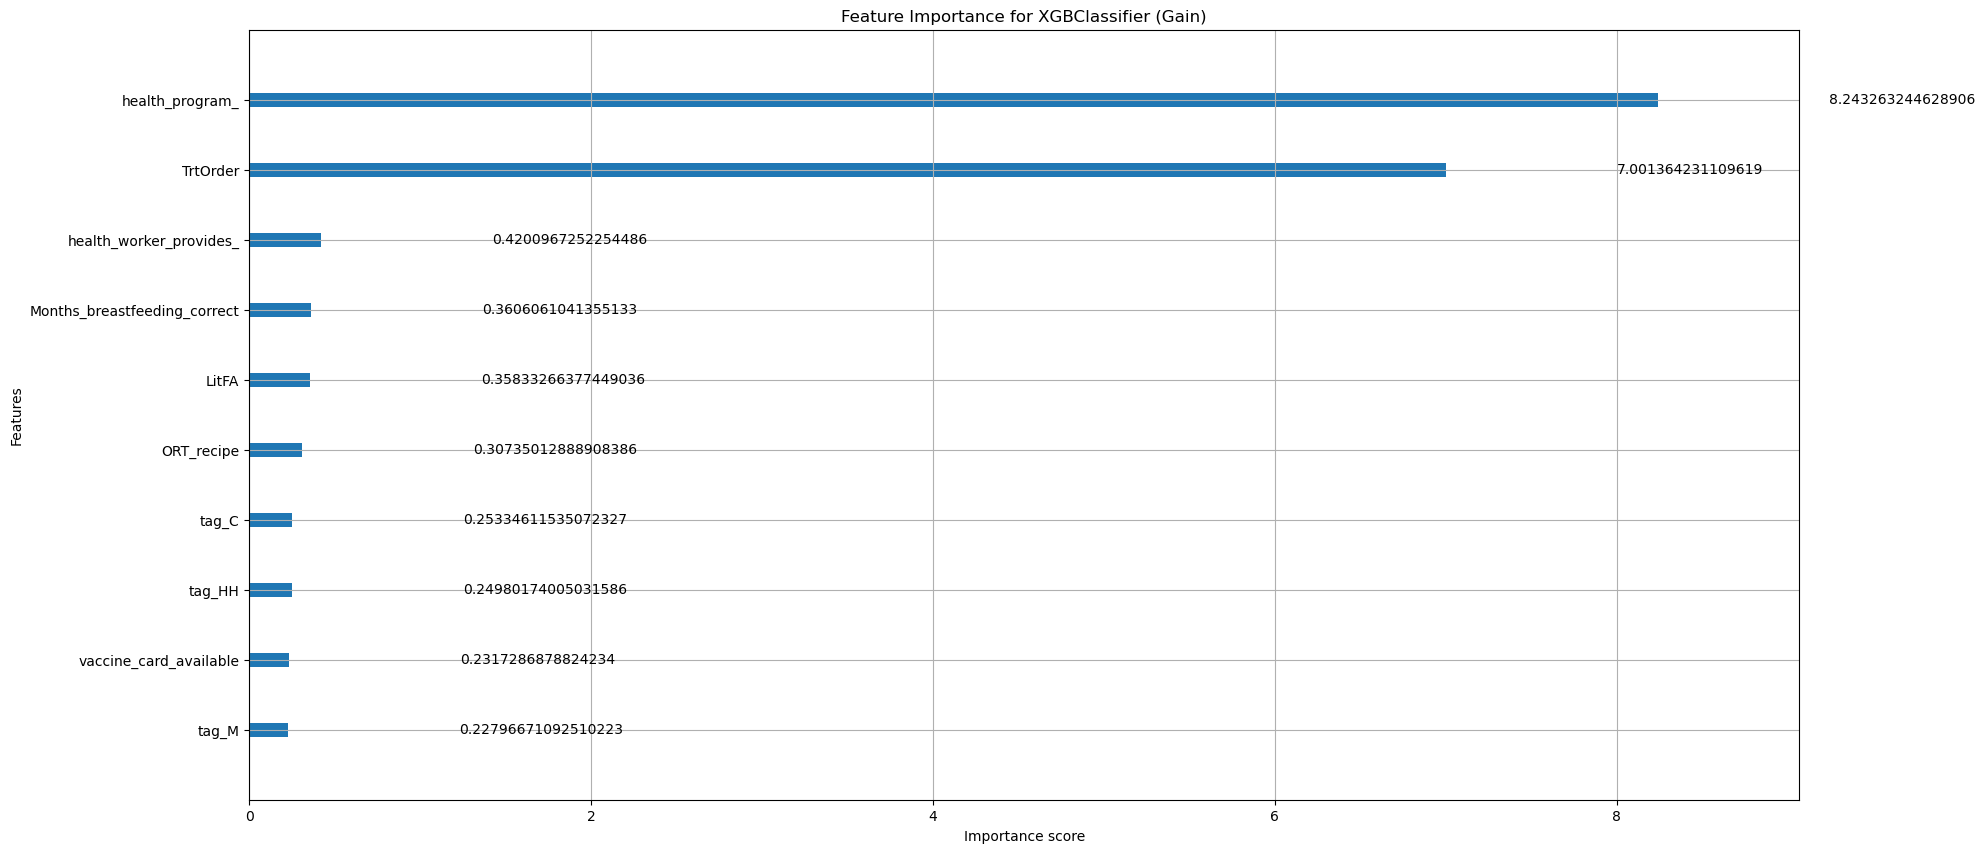

Feature Importance:
                         Feature  Importance
3               health_program_    0.466938
0                      TrtOrder    0.396591
4       health_worker_provides_    0.023796
6  Months_breastfeeding_correct    0.020426
1                         LitFA    0.020298
5                    ORT_recipe    0.017410
8                         tag_C    0.014351
7                        tag_HH    0.014150
2        vaccine_card_available    0.013126
9                         tag_M    0.012913


In [141]:
# XGBoost provides built-in feature importance scores based on how much each feature contributes to 
# reducing the loss (e.g., gain, weight). Let’s visualize this to confirm which features are driving the high accuracy.


from xgboost import plot_importance

# Plot feature importance
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title('Feature Importance for XGBClassifier (Gain)')
plt.show()

# Extract and display feature importance
importance = pd.DataFrame({
                                'Feature': X.columns,
                                'Importance': xgb_model.feature_importances_
                          }).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", importance)


# Why: importance_type='gain' measures the average gain of splits that use the feature, which is a good indicator of predictive power.
# Expected: health_program_, TrtOrder, and TrtOrder2013 should rank high, aligning with your box plots and mean differences.


### <span style="color :Green  ">   ----------------------- XGB : cross validation ---------------------------

In [142]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Loss function to optimize
    use_label_encoder=False,      # Avoids deprecation warning
    random_state=42
)

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold stratified cross-validation
accuracy_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='accuracy')
roc_auc_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='roc_auc')

# Print evaluation results
print("Mean Accuracy:", accuracy_scores.mean())
print("Mean ROC-AUC Score:", roc_auc_scores.mean())



Mean Accuracy: 0.929245283018868
Mean ROC-AUC Score: 0.9631318974724101


#### <span style="color :green ">Hyper parameter tuning  ( XGBClassifier )

#### <span style="color :blue  ">   XGBClassifier with GridSearchCV 

In [143]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200 ],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Grid search
grid_search = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'), 
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
#print("Test Accuracy :", accuracy_score(y_test, y_pred_best))

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report :\n", classification_report(y_test, y_pred_best))


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.934561860142287
Accuracy: 0.9386792452830188
ROC-AUC Score: 0.9630022321428572
Classification Report :
               precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       200
         1.0       0.92      0.98      0.95       224

    accuracy                           0.95       424
   macro avg       0.95      0.94      0.95       424
weighted avg       0.95      0.95      0.95       424



#### <span style="color :blue  ">   XGBClassifier with RandomizedSearchCV 

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
# import numpy as np

# # Initialize XGBoost classifier with some sensible defaults
# xgb_model = xgb.XGBClassifier(
#     objective='binary:logistic',
#     eval_metric='logloss',
#     use_label_encoder=False,
#     random_state=42
# )

# # Expanded and refined hyperparameter distribution
# param_dist = {
#     'max_depth': [3, 4, 5, 6, 7, 8, 9],                  # Wider range for tree depth
#     'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3], # Finer learning rate steps
#     'n_estimators': [100, 200, 300, 400, 500, 600],      # More trees
#     'min_child_weight': [1, 2, 3, 4, 5],                # More options for regularization
#     'gamma': [0, 0.05, 0.1, 0.2, 0.5],                  # Finer gamma steps
#     'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],        # Include full sampling
#     'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # Wider column sampling
#     'reg_alpha': [0, 0.01, 0.1, 1.0, 10.0],            # Stronger L1 regularization
#     'reg_lambda': [0.5, 1.0, 1.5, 2.0, 3.0]            # Stronger L2 regularization
# }

# # Initialize RandomizedSearchCV with more iterations
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_dist,
#     n_iter=100,             # Increase iterations for better coverage
#     scoring='roc_auc',      # Optimize for ROC-AUC
#     cv=5,                  # 5-fold CV
#     verbose=2,
#     random_state=42,
#     n_jobs=-1,
#     return_train_score=True  # Track training scores to check overfitting
# )

# # Fit the random search
# random_search.fit(X_train, y_train)

# # Best parameters and model
# print("Best Parameters:", random_search.best_params_)
# best_model = random_search.best_estimator_

# # Predict on test set
# y_pred = best_model.predict(X_test)
# y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# # Evaluate
# print("\nAccuracy:", accuracy_score(y_test, y_pred))
# print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
# print("Classification Report:\n", classification_report(y_test, y_pred))

# # Check training performance to diagnose overfitting
# y_train_pred = best_model.predict(X_train)
# y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]
# print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))
# print("Training ROC-AUC:", roc_auc_score(y_train, y_train_pred_proba))

### ---------------------observation------------------------

i think : overfitting 
Training Accuracy: 0.9759
Test Accuracy: 0.9389
Training ROC-AUC: 0.9974
Test ROC-AUC: 0.9789
Observation: The training accuracy (0.9759) is much higher than the test accuracy (0.9389), and the training ROC-AUC (0.9974) is near-perfect compared to the test ROC-AUC (0.9789). A gap like this (e.g., 0.9759 - 0.9389 = 0.037 or 3.7% in accuracy) suggests the model is overfitting—it performs significantly better on the data it was trained on than on new data.

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
# import numpy as np

# # Define parameter grid (wider range for random search)
# # param_dist = {
# #     'n_estimators': np.arange(50, 300, 50),  # Random values from 50 to 250
# #     'max_depth': np.arange(2, 10, 1),  # Random values from 2 to 9
# #     'learning_rate': np.linspace(0.01, 0.3, 10)  # 10 random values from 0.01 to 0.3
# # }
# param_dist = {
#     'n_estimators': [200, 300, 400],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.05, 0.1, 0.15],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }



# # Random search
# random_search = RandomizedSearchCV(
#     XGBClassifier(random_state=42, eval_metric='logloss'), 
#     param_distributions=param_dist, 
#     n_iter=10,  # Number of random combinations to try
#     cv=5,  # 5-fold cross-validation
#     scoring='accuracy', 
#     n_jobs=-1, 
#     random_state=42  # Ensures reproducibility
# )
# random_search.fit(X_train, y_train)

# # Best model
# print("Best Parameters:", random_search.best_params_)
# print("Best Cross-Validation Accuracy:", random_search.best_score_)

# # Evaluate on test set
# best_xgb = random_search.best_estimator_
# y_pred_best = best_xgb.predict(X_test)
# y_pred_proba_best = best_xgb.predict_proba(X_test)[:, 1]  # Probability scores for AUC

# # Evaluate
# print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
# print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_best))
# print("Classification Report:\n", classification_report(y_test, y_pred_best))


In [ ]:
# Check Overfitting vs. Underfitting
# Look at training vs. test accuracy:

train_pred = best_xgb.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, y_pred_best)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")



#### OBSERVATION

Your train accuracy (95.53%) is slightly higher than test accuracy (94.83%), but not by a huge margin.
This suggests slight overfitting, but not extreme.
Here’s how you can further improve generalization and boost test accuracy:



In [ ]:
#___________________________________update random search--------------------------------------------

In [122]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import numpy as np

# Define parameter grid (wider range for random search)
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Random values from 50 to 250
    'max_depth': np.arange(2, 10, 1),  # Random values from 2 to 9
    'learning_rate': np.linspace(0.01, 0.3, 10),  # 10 random values from 0.01 to 0.3
    'reg_lambda': [2, 5, 10]  # Increase L2 regularization to prevent overfitting
}

# Random search
random_search = RandomizedSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'), 
    param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy', 
    n_jobs=-1, 
    random_state=42  # Ensures reproducibility
)
random_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate on test set
best_xgb = random_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
y_pred_proba_best = best_xgb.predict_proba(X_test)[:, 1]  # Probability scores for AUC

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

print("======================================================================================")
# Perform additional cross-validation with the best model for accuracy and ROC-AUC
# evaluate the already trained model (best_xgb) using cross-validation.
cv_roc_auc = cross_val_score(best_xgb, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
cv_accuracy = cross_val_score(best_xgb, X, y, cv=5, scoring='accuracy', n_jobs=-1)

print("\nCross-Validated ROC-AUC Scores:", cv_roc_auc)
print("Mean CV ROC-AUC:", cv_roc_auc.mean())
print("Cross-Validated Accuracy Scores:", cv_accuracy)
print("Mean CV Accuracy:", cv_accuracy.mean())


Best Parameters: {'reg_lambda': 5, 'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.3}
Best Cross-Validation Accuracy: 0.9394117647058824
Test Accuracy: 0.9460093896713615
ROC-AUC Score: 0.9777140967706383
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       211
         1.0       0.93      0.97      0.95       215

    accuracy                           0.95       426
   macro avg       0.95      0.95      0.95       426
weighted avg       0.95      0.95      0.95       426


Cross-Validated ROC-AUC Scores: [0.97332981 0.91828328 0.9279387  0.98250509 0.97723448]
Mean CV ROC-AUC: 0.9558582724385406
Cross-Validated Accuracy Scores: [0.92488263 0.87764706 0.87294118 0.94588235 0.92      ]
Mean CV Accuracy: 0.9082706434686552


In [321]:
# Check Overfitting vs. Underfitting
# Look at training vs. test accuracy:

train_pred = best_xgb.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, y_pred_best)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")


Train Accuracy: 0.951764705882353
Test Accuracy: 0.9507042253521126


#### Observation 
Your train accuracy (95.18%) and test accuracy (95.07%) are very close, which indicates that your model is generalizing well and is not overfitting significantly. I think this is a good sign! 

In [ ]:
#................................................................................................

#### observation 
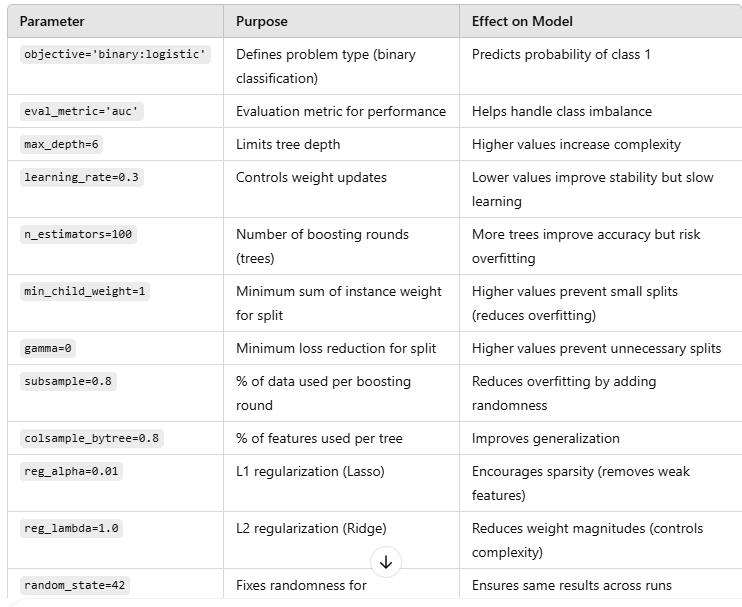

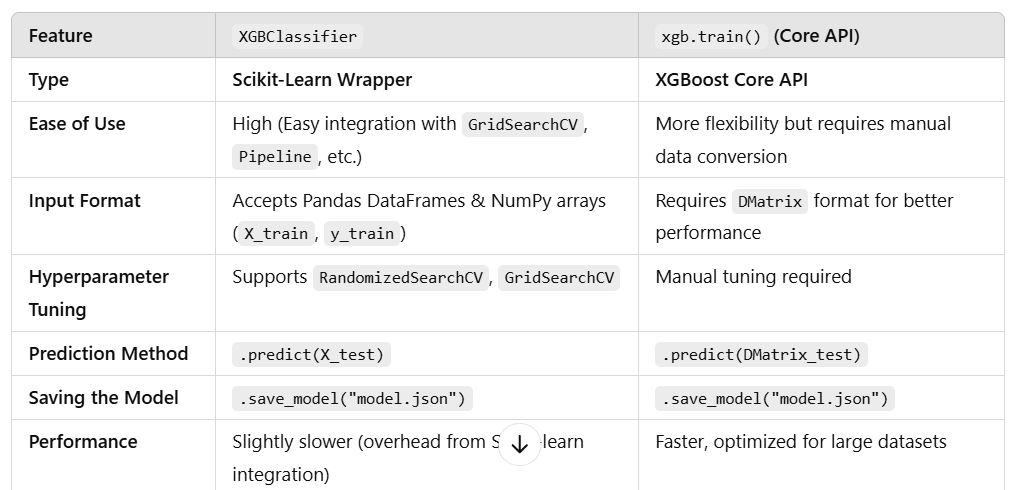

### <span style="color :RED  "> FINAL ORBSERVATION   : 

Finalize and Save the Original Model(train test slipt + randomsearch)

(When comparing train-test-split and cross validation, train-test-split gives relatively good results. So I chose train-test-split model with RandomizedSearchCV)

In [144]:

# ........................  save the model ----------------------------------------

import joblib

# Save the best model
joblib.dump(best_xgb, "xgboost_model.pkl")
print("Model saved as xgboost_model.pkl")



Model saved as xgboost_model.pkl


In [ ]:
# import shap

# # Explain predictions with SHAP
# explainer = shap.TreeExplainer(best_xgb)
# shap_values = explainer.shap_values(X_test)

# # Summary plot
# shap.summary_plot(shap_values, X_test, plot_type="bar")
# plt.title('SHAP Feature Importance for XGBClassifier')
# plt.show()

# # Detailed summary plot (shows direction of impact)
# shap.summary_plot(shap_values, X_test)
# plt.title('SHAP Values for XGBClassifier (Direction of Impact)')
# plt.show()

In [ ]:
#!pip install shap
